In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as st
# Read dataset into a DataFrame
df = pd.read_csv("po2_data.csv")

In [2]:
print(df)
print(df.head())

      subject#  age  sex  test_time  motor_updrs  total_updrs  jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      jitter(abs)  jitter(rap)  jitter(ppq5)  ...  shimmer(abs)  \
0        0.000034   

In [3]:
print(df.describe())

          subject#          age          sex    test_time  motor_updrs  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_updrs    jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000   5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987      0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124      0.003732  ...   
min       7.0

In [4]:
print(df.isnull().sum())

subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64


# Task1

In [5]:
x = df[['age', 'sex', 'jitter(%)', 
              'jitter(abs)', 'test_time', 'jitter(rap)', 'jitter(ppq5)',
              'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 
              'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 
              'shimmer(dda)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']] 

y_mobile_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']

In [6]:
print(x)

      age  sex  jitter(%)  jitter(abs)  test_time  jitter(rap)  jitter(ppq5)  \
0      72    0    0.00662     0.000034     5.6431      0.00401       0.00317   
1      72    0    0.00300     0.000017    12.6660      0.00132       0.00150   
2      72    0    0.00481     0.000025    19.6810      0.00205       0.00208   
3      72    0    0.00528     0.000027    25.6470      0.00191       0.00264   
4      72    0    0.00335     0.000020    33.6420      0.00093       0.00130   
...   ...  ...        ...          ...        ...          ...           ...   
5870   61    0    0.00406     0.000031   142.7900      0.00167       0.00168   
5871   61    0    0.00297     0.000025   149.8400      0.00119       0.00147   
5872   61    0    0.00349     0.000025   156.8200      0.00152       0.00187   
5873   61    0    0.00281     0.000020   163.7300      0.00128       0.00151   
5874   61    0    0.00282     0.000021   170.7300      0.00135       0.00166   

      jitter(ddp)  shimmer(%)  shimmer(

# motor_updrs

In [7]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(x, y_mobile_updrs, test_size=0.4, random_state=0)

In [8]:
# Build a linear regression model
model = LinearRegression()

Intercept:  28.13932344562846
Coefficient:  [ 1.93810129e-01 -1.00654789e+00  3.20915681e+02 -5.60993188e+04
  1.47140659e-02 -7.48658204e+04 -3.00844660e+02  2.50523559e+04
  1.49507754e+02 -5.98594725e+00  2.41701146e+04 -1.58226546e+02
  7.92057112e+01 -8.10637811e+03 -1.28075361e+01 -3.60408778e-01
  2.85261980e+00 -2.53237959e+01  1.70024587e+01]
      Actual  Predicted
5588  29.635  21.254943
4802  36.153  24.627460
3060  12.664  19.476097
4228  19.168  33.224031
5796  21.988  21.374672
...      ...        ...
4164  19.417  15.606926
457   18.298  25.624220
358   28.720  18.989425
441   12.338  25.415005
1640  18.742  23.448985

[2350 rows x 2 columns]
MLP performance:
MAE:  6.2996702308554635
MSE:  55.67732185466879
RMSE:  7.461723785739378
RMSE (Normalised):  0.2164493618463964
R^2:  0.14387785074405346
Adjusted R^2 0.1410996576038549


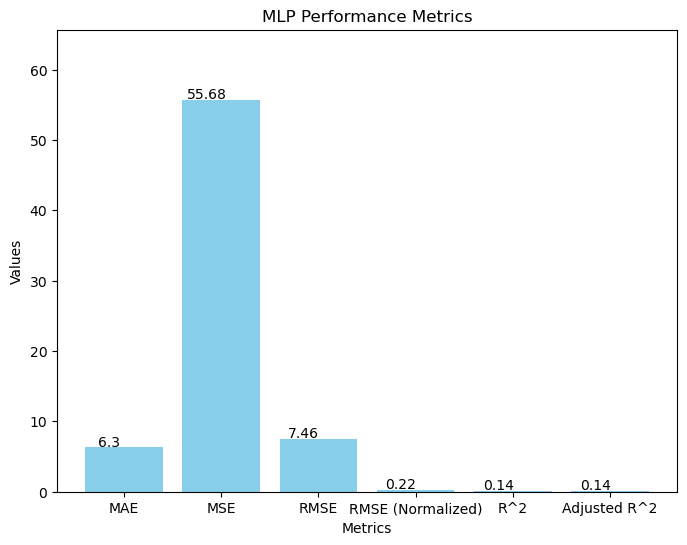

In [9]:
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)
# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
 
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)


# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()


# total updrs

In [10]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(x, y_total_updrs, test_size=0.4, random_state=0)

In [11]:
# Build a linear regression model
model = LinearRegression()

Intercept:  36.519869987287706
Coefficient:  [ 3.04724972e-01 -2.64370960e+00 -1.29604549e+01 -5.33331296e+04
  2.14121076e-02 -9.38861982e+04 -2.95648055e+02  3.15881314e+04
  1.35393981e+02 -6.91723044e+00  1.42698980e+04 -9.36146471e+01
  6.87305243e+01 -4.82487004e+03 -1.78186658e+01 -5.30996577e-01
  6.61088927e+00 -3.40152619e+01  1.87848536e+01]
      Actual  Predicted
5588  37.635  27.723756
4802  54.153  34.037335
3060  26.443  25.772311
4228  23.237  43.410240
5796  32.988  29.700347
...      ...        ...
4164  29.476  21.823001
457   27.298  35.692800
358   36.402  25.892567
441   18.007  35.444275
1640  26.345  31.593040

[2350 rows x 2 columns]
MLP performance:
MAE:  7.970479198532716
MSE:  93.61267427230467
RMSE:  9.675364296619774
RMSE (Normalised):  0.2016036901279333
R^2:  0.1615522647039036
Adjusted R^2 0.15883142662181549


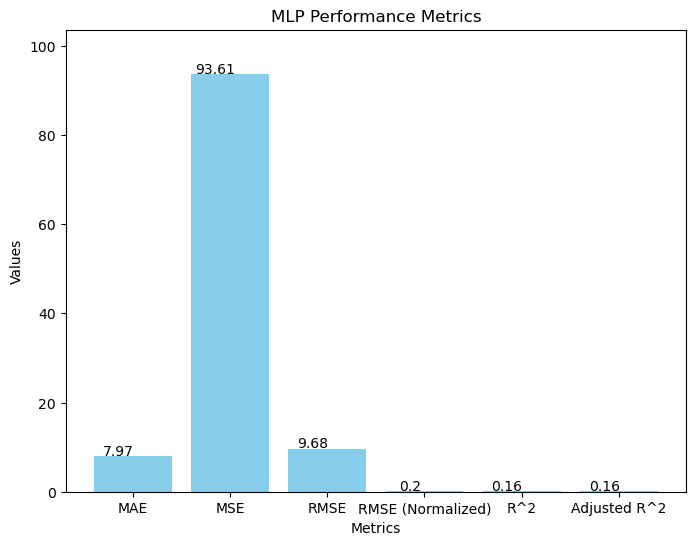

In [12]:
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# Part 2

# 50-50 motor_updrs

Intercept:  28.504017840557843
Coefficient:  [ 1.91836419e-01 -8.04846020e-01  2.93771575e+02 -5.13559177e+04
  1.51134012e-02 -6.11170416e+04 -1.86597426e+02  2.04312062e+04
  1.42492746e+02 -6.09210031e+00  7.71657197e+04 -1.84544094e+02
  8.56249048e+01 -2.57589455e+04 -1.34703582e+01 -3.50946967e-01
  2.51365750e+00 -2.59873093e+01  1.69187523e+01]
      Actual  Predicted
5588  29.635  21.275268
4802  36.153  24.283404
3060  12.664  19.416342
4228  19.168  33.008392
5796  21.988  21.237644
...      ...        ...
4027  23.667  25.513239
3814  31.238  21.038373
3373  30.335  26.655792
4401  24.543  24.591673
4711  35.725  22.028665

[2938 rows x 2 columns]
MLP performance:
MAE:  6.302164972578627
MSE:  55.33048617957754
RMSE:  7.438446489662848
RMSE (Normalised):  0.21577413504546555
R^2:  0.15033335490326438
Adjusted R^2 0.14757611045290775


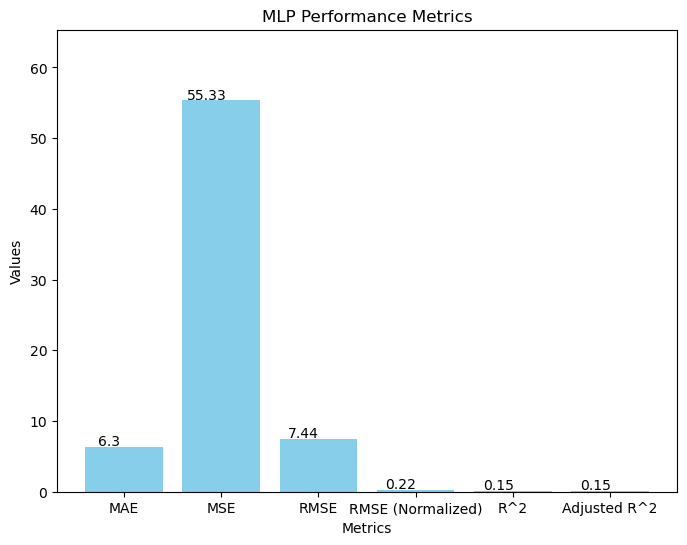

In [13]:
# Split dataset into 50% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(x, y_mobile_updrs, test_size=0.5, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# 60-40 motor_updrs

Intercept:  28.13932344562846
Coefficient:  [ 1.93810129e-01 -1.00654789e+00  3.20915681e+02 -5.60993188e+04
  1.47140659e-02 -7.48658204e+04 -3.00844660e+02  2.50523559e+04
  1.49507754e+02 -5.98594725e+00  2.41701146e+04 -1.58226546e+02
  7.92057112e+01 -8.10637811e+03 -1.28075361e+01 -3.60408778e-01
  2.85261980e+00 -2.53237959e+01  1.70024587e+01]
      Actual  Predicted
5588  29.635  21.254943
4802  36.153  24.627460
3060  12.664  19.476097
4228  19.168  33.224031
5796  21.988  21.374672
...      ...        ...
4164  19.417  15.606926
457   18.298  25.624220
358   28.720  18.989425
441   12.338  25.415005
1640  18.742  23.448985

[2350 rows x 2 columns]
MLP performance:
MAE:  6.2996702308554635
MSE:  55.67732185466879
RMSE:  7.461723785739378
RMSE (Normalised):  0.2164493618463964
R^2:  0.14387785074405346
Adjusted R^2 0.1410996576038549


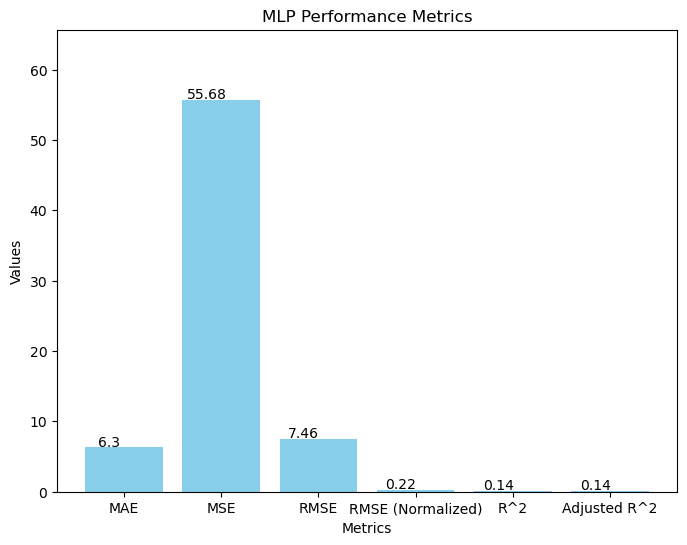

In [14]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(x, y_mobile_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# 70-30 motor_updrs

Intercept:  29.475432578442682
Coefficient:  [ 1.93145159e-01 -1.03941810e+00  3.70906576e+02 -6.39259679e+04
  1.43490103e-02 -8.08697572e+04 -4.10258764e+02  2.70742695e+04
  1.50174398e+02 -6.83036498e+00  2.54796920e+04 -1.18563858e+02
  7.38776609e+01 -8.54997491e+03 -1.33070334e+01 -4.13552646e-01
  1.57740109e+00 -2.41822715e+01  1.71124223e+01]
       Actual  Predicted
5588  29.6350  21.344562
4802  36.1530  25.069683
3060  12.6640  19.604111
4228  19.1680  33.316403
5796  21.9880  21.364773
...       ...        ...
5567  33.2040  24.721598
325   26.3760  19.715983
2262   8.3171  22.912636
1115  20.8710  31.560646
1855   6.5651  16.791423

[1763 rows x 2 columns]
MLP performance:
MAE:  6.31242385815894
MSE:  55.70160524421247
RMSE:  7.463350805383094
RMSE (Normalised):  0.2164965583620684
R^2:  0.1428428080488917
Adjusted R^2 0.1400612561023381


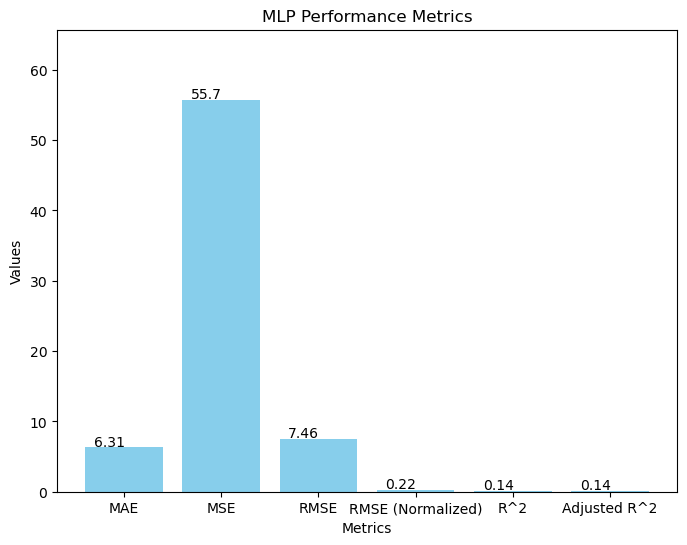

In [15]:
# Split dataset into 70% training and 30% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(x, y_mobile_updrs, test_size=0.3, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# 80-20 motor_updrs

Intercept:  29.996825308264686
Coefficient:  [ 1.92711637e-01 -1.06322980e+00  3.70273870e+02 -6.51877751e+04
  1.32859288e-02 -6.66126125e+04 -4.02144247e+02  2.23180713e+04
  1.44667854e+02 -6.53200941e+00  2.04978510e+03 -1.09164959e+02
  7.38582142e+01 -7.43055145e+02 -1.28767137e+01 -4.27150859e-01
  1.52413144e+00 -2.40962152e+01  1.70966222e+01]
      Actual  Predicted
5588  29.635  21.469302
4802  36.153  25.169620
3060  12.664  19.565500
4228  19.168  33.247474
5796  21.988  21.419628
...      ...        ...
4698  36.550  21.555453
2328  28.807  19.331535
5696  34.380  25.389711
862   27.729  22.807786
3100  14.160  20.130295

[1175 rows x 2 columns]
MLP performance:
MAE:  6.355334866082809
MSE:  56.89987302674417
RMSE:  7.543200449858413
RMSE (Normalised):  0.21881283340609728
R^2:  0.1290947863271117
Adjusted R^2 0.1262686208173277


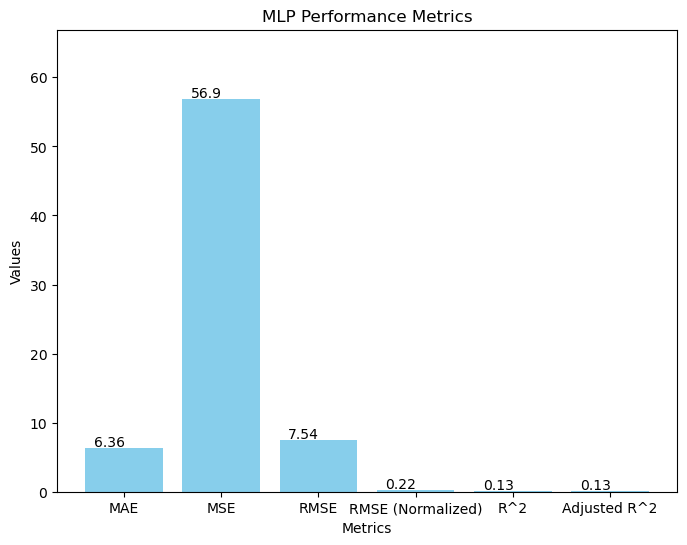

In [16]:
# Split dataset into 80% training and 20% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(x, y_mobile_updrs, test_size=0.2, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# 50-50 total_updrs

Intercept:  36.688997133494134
Coefficient:  [ 3.03707358e-01 -2.42848574e+00 -1.37566325e+01 -4.95373500e+04
  2.14698183e-02 -7.10093149e+04 -1.94608261e+02  2.39224938e+04
  1.29894517e+02 -6.58805947e+00  7.27525767e+04 -1.14771852e+02
  6.81192017e+01 -2.43077428e+04 -2.06065233e+01 -5.29865775e-01
  6.59408794e+00 -3.42162378e+01  1.80509735e+01]
      Actual  Predicted
5588  37.635  27.836163
4802  54.153  33.861188
3060  26.443  25.725750
4228  23.237  42.989223
5796  32.988  29.465944
...      ...        ...
4027  30.335  35.395611
3814  37.429  28.348813
3373  49.419  37.363408
4401  28.929  32.280472
4711  54.150  30.293320

[2938 rows x 2 columns]
MLP performance:
MAE:  7.964800271232056
MSE:  92.81832686276593
RMSE:  9.634226843019938
RMSE (Normalised):  0.20074651698241247
R^2:  0.17293620666969
Adjusted R^2 0.1702523105000442


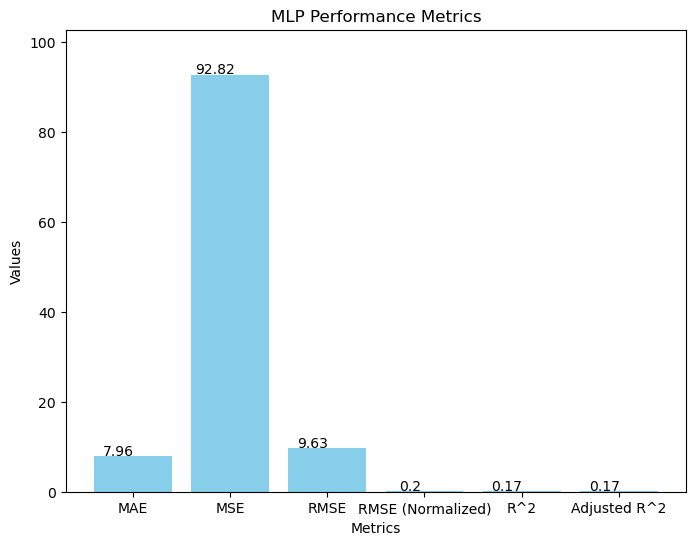

In [17]:
# Split dataset into 50% training and 50% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(x, y_total_updrs, test_size=0.5, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# 60-40 total_updrs

Intercept:  36.519869987287706
Coefficient:  [ 3.04724972e-01 -2.64370960e+00 -1.29604549e+01 -5.33331296e+04
  2.14121076e-02 -9.38861982e+04 -2.95648055e+02  3.15881314e+04
  1.35393981e+02 -6.91723044e+00  1.42698980e+04 -9.36146471e+01
  6.87305243e+01 -4.82487004e+03 -1.78186658e+01 -5.30996577e-01
  6.61088927e+00 -3.40152619e+01  1.87848536e+01]
      Actual  Predicted
5588  37.635  27.723756
4802  54.153  34.037335
3060  26.443  25.772311
4228  23.237  43.410240
5796  32.988  29.700347
...      ...        ...
4164  29.476  21.823001
457   27.298  35.692800
358   36.402  25.892567
441   18.007  35.444275
1640  26.345  31.593040

[2350 rows x 2 columns]
MLP performance:
MAE:  7.970479198532716
MSE:  93.61267427230467
RMSE:  9.675364296619774
RMSE (Normalised):  0.2016036901279333
R^2:  0.1615522647039036
Adjusted R^2 0.15883142662181549


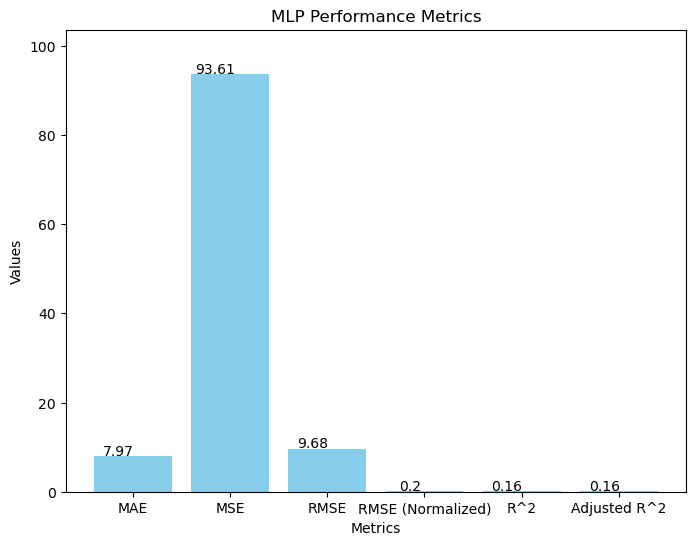

In [18]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(x, y_total_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# 70-30 total_updrs

Intercept:  38.84655783929309
Coefficient:  [ 3.08269238e-01 -2.72114752e+00  2.71625849e+01 -6.08880573e+04
  2.04385899e-02 -9.06363117e+04 -4.04043919e+02  3.05290505e+04
  1.44210256e+02 -7.93511468e+00  2.00397352e+04 -4.71488291e+01
  5.67236419e+01 -6.75952057e+03 -1.83071532e+01 -6.12850701e-01
  4.82052497e+00 -3.28586394e+01  1.78892008e+01]
      Actual  Predicted
5588  37.635  27.884137
4802  54.153  34.565586
3060  26.443  25.852124
4228  23.237  43.157817
5796  32.988  29.709414
...      ...        ...
5567  41.204  31.366195
325   30.627  27.038929
2262  18.951  31.833635
1115  26.871  42.296791
1855  10.646  21.688960

[1763 rows x 2 columns]
MLP performance:
MAE:  7.941049972854157
MSE:  92.30407786452922
RMSE:  9.607501124877853
RMSE (Normalised):  0.2001896383746844
R^2:  0.1628930899673553
Adjusted R^2 0.1601766029834748


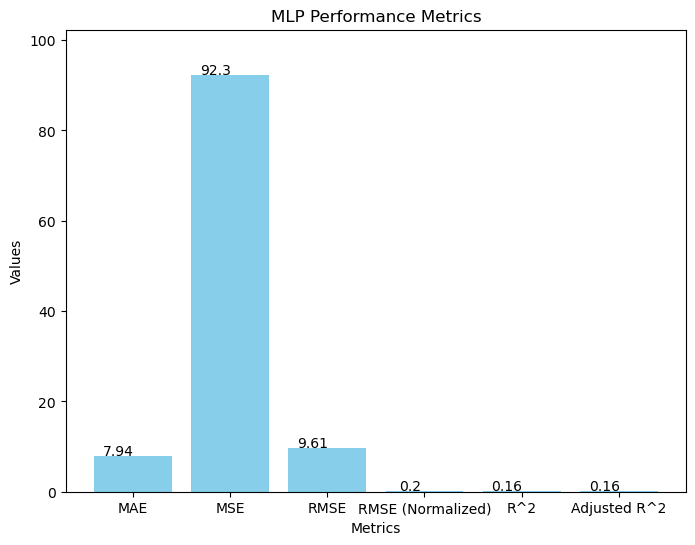

In [19]:
# Split dataset into 70% training and 30% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(x, y_total_updrs, test_size=0.3, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# 80-20 total_updrs

Intercept:  39.249444506373635
Coefficient:  [ 3.06648905e-01 -2.73112684e+00  6.43662012e+01 -6.24238505e+04
  1.88326126e-02 -7.87940650e+04 -4.05357399e+02  2.65575179e+04
  1.36465489e+02 -7.38660268e+00 -7.17177819e+03 -3.73857438e+01
  5.44471135e+01  2.30846883e+03 -1.78647974e+01 -6.20809309e-01
  4.90783442e+00 -3.27136067e+01  1.78702212e+01]
      Actual  Predicted
5588  37.635  27.989972
4802  54.153  34.515246
3060  26.443  25.787540
4228  23.237  42.845871
5796  32.988  29.709103
...      ...        ...
4698  54.550  29.764923
2328  34.807  26.102731
5696  43.104  33.394200
862   39.136  30.782628
3100  27.440  26.288815

[1175 rows x 2 columns]
MLP performance:
MAE:  8.00062615919217
MSE:  94.99627464313981
RMSE:  9.746603236160782
RMSE (Normalised):  0.20308808210036636
R^2:  0.14774142629066866
Adjusted R^2 0.14497577079955382


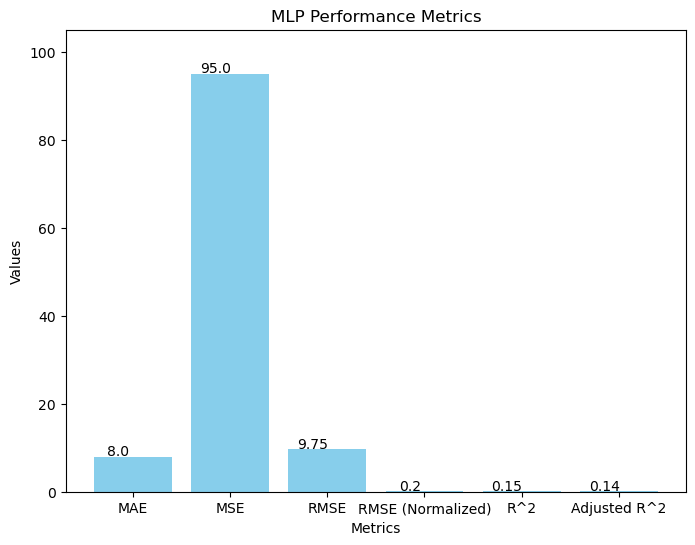

In [20]:
# Split dataset into 80% training and 20% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(x, y_total_updrs, test_size=0.2, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# part 3

In [21]:
df = pd.read_csv("po2_data.csv")
x = df[['age', 'sex', 'jitter(%)', 
              'jitter(abs)', 'test_time', 'jitter(rap)', 'jitter(ppq5)',
              'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 
              'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 
              'shimmer(dda)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']] 

y_mobile_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']

In [22]:
column_names = list(x.columns)
print(column_names)

['age', 'sex', 'jitter(%)', 'jitter(abs)', 'test_time', 'jitter(rap)', 'jitter(ppq5)', 'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']


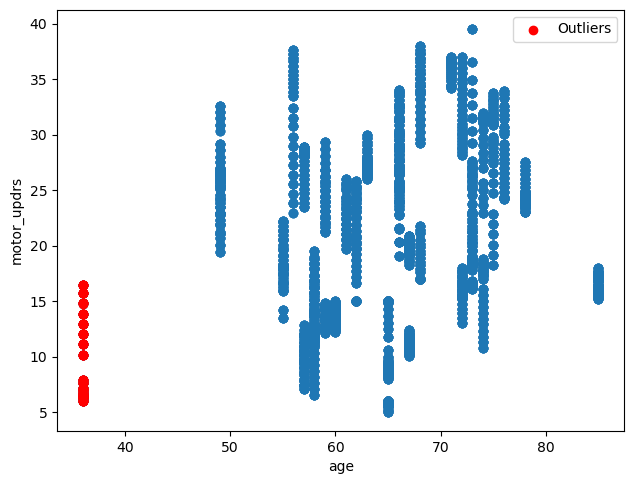

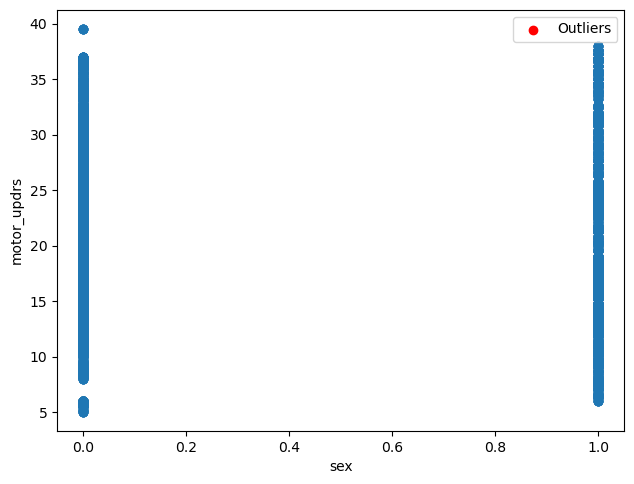

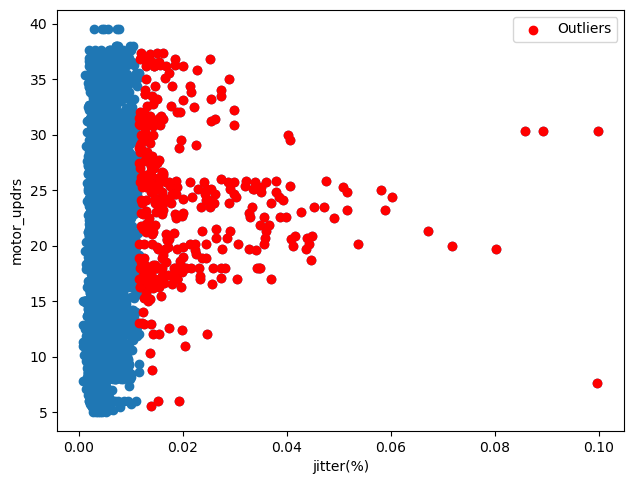

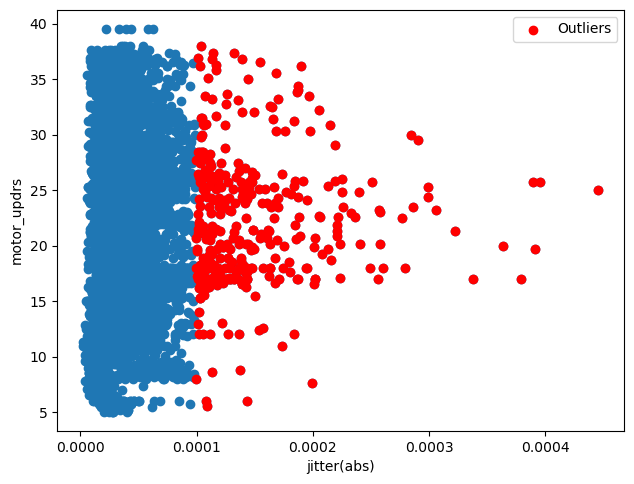

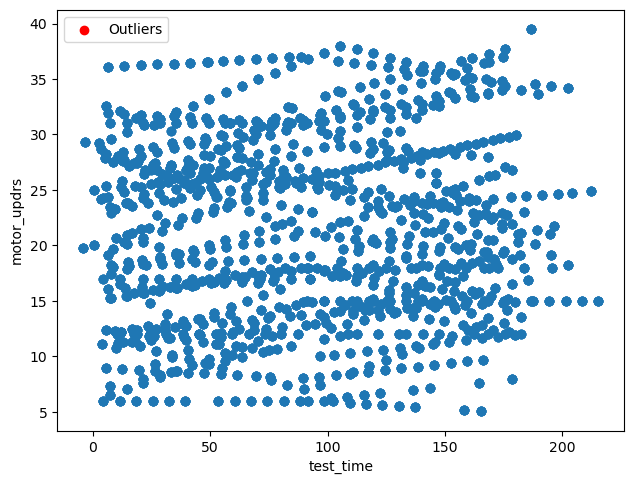

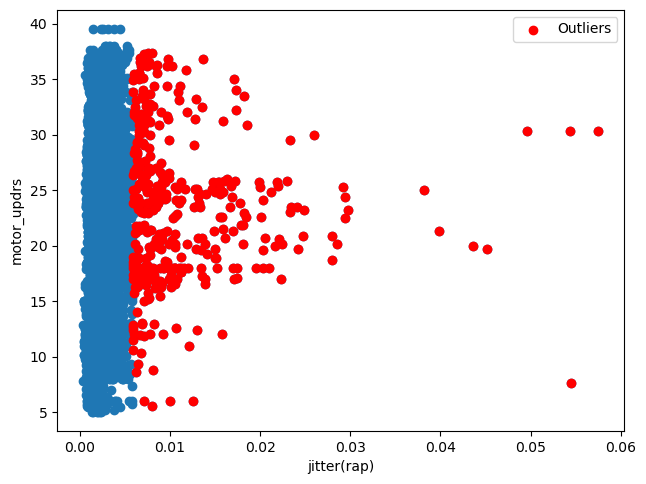

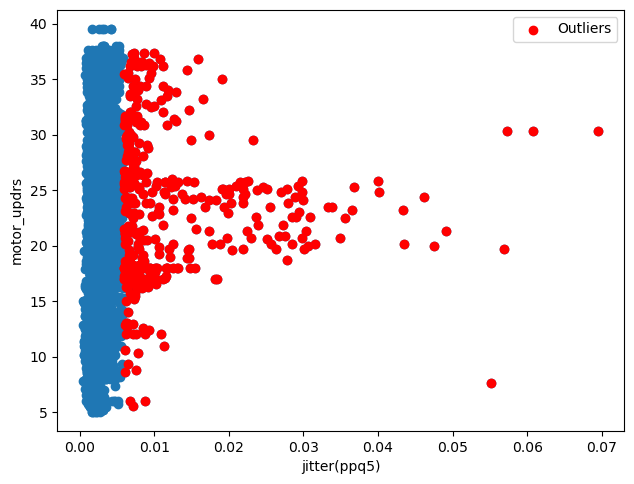

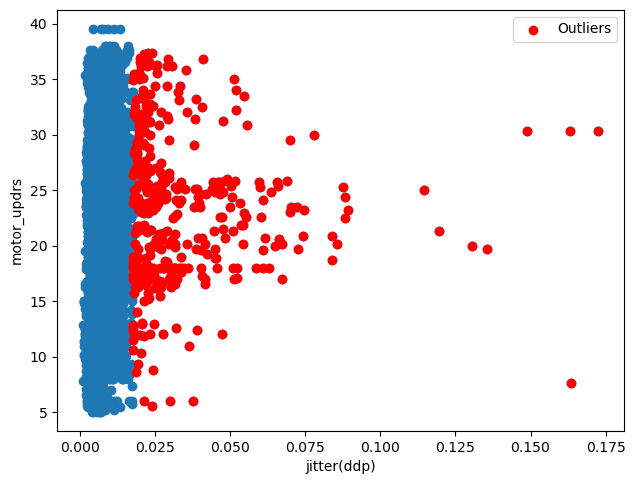

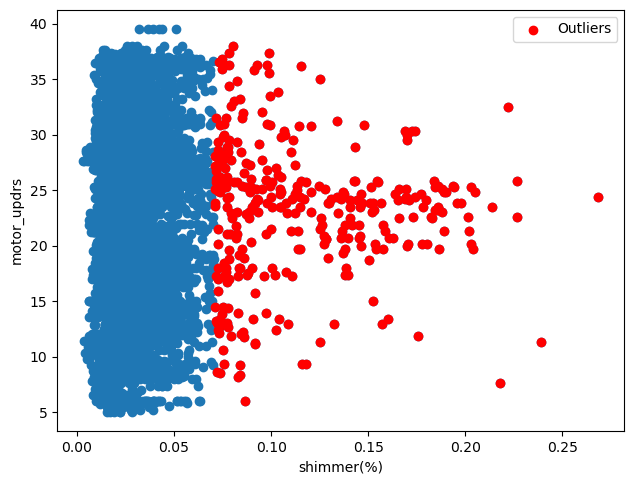

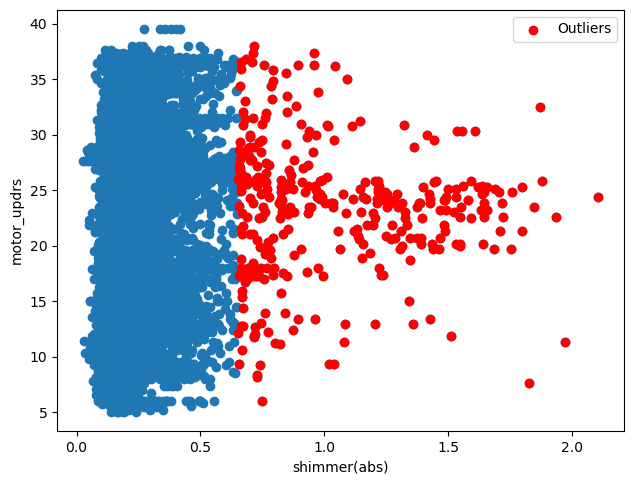

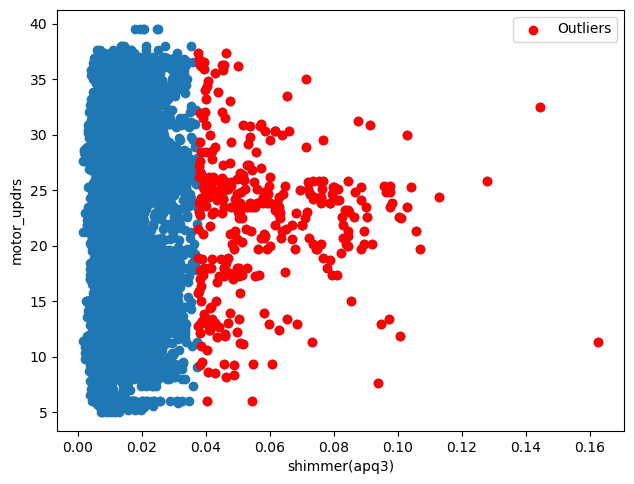

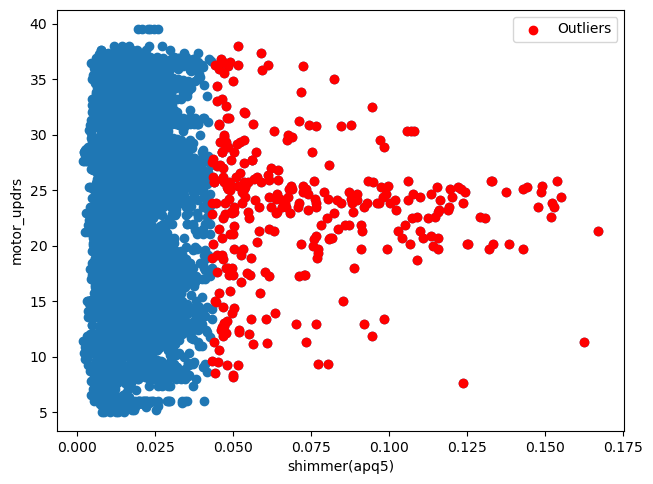

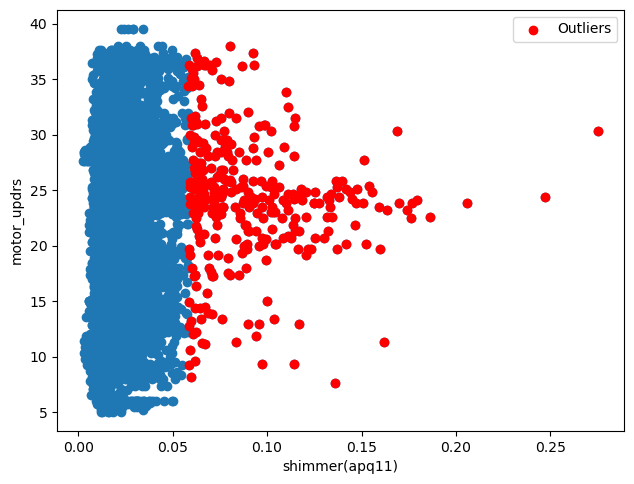

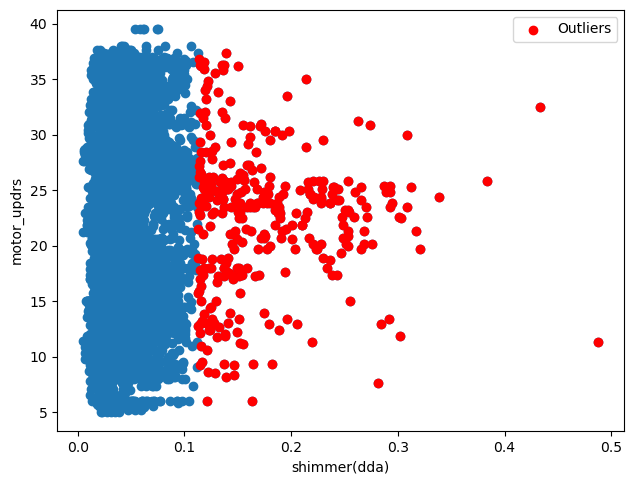

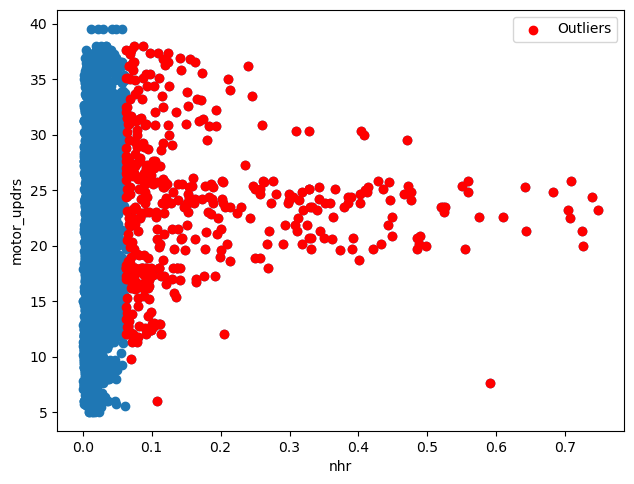

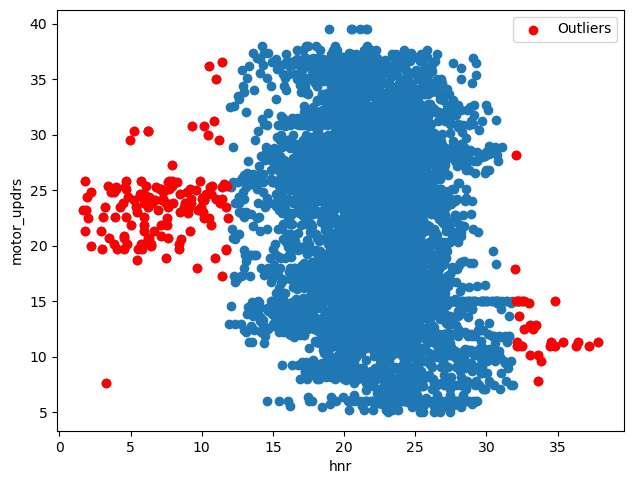

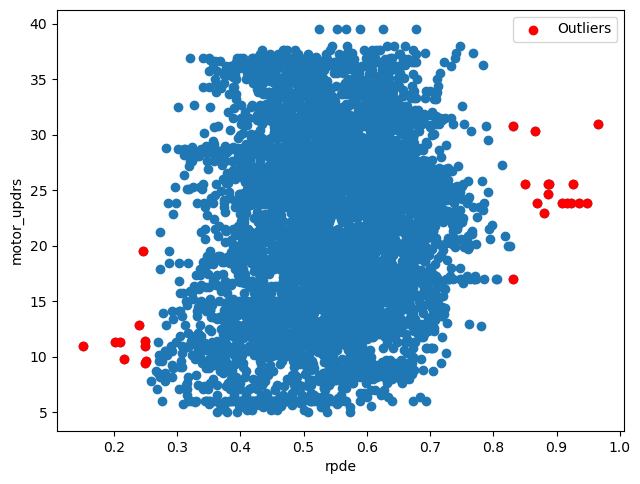

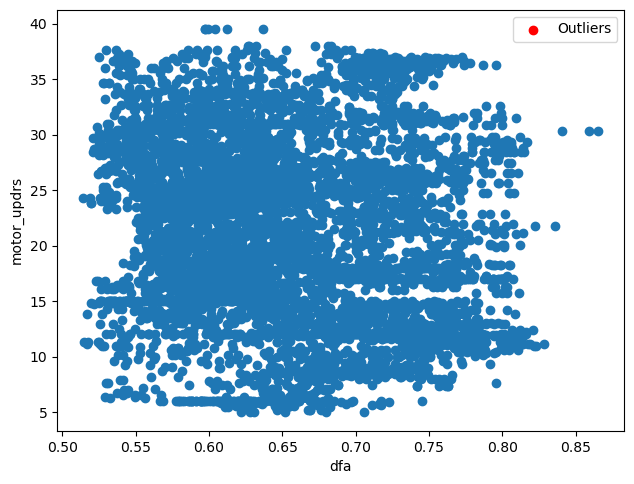

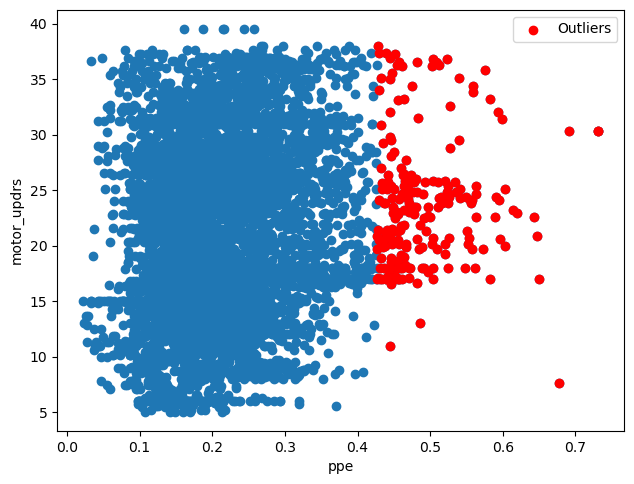

In [23]:

for i in range(0, 19):
    column_name = column_names[i]
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
#     df = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    fig1, ax1 = plt.subplots()
    fig1.tight_layout()
    ax1.scatter(x=df[column_name], y=df['motor_updrs'])
    ax1.set_xlabel(column_name)
    ax1.set_ylabel("motor_updrs")
    
    # Highlight outliers on the plot
    ax1.scatter(x=outliers[column_name], y=outliers['motor_updrs'], color='red', label='Outliers')
    ax1.legend()
    
    plt.show()

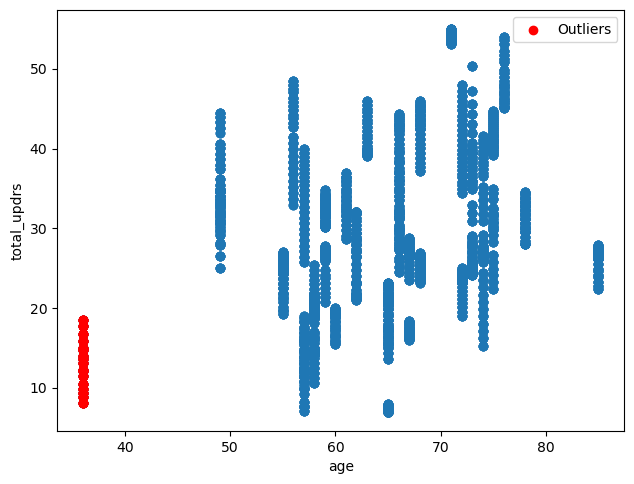

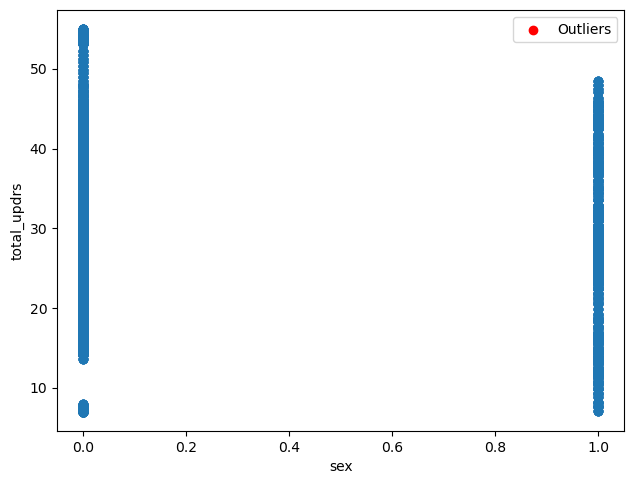

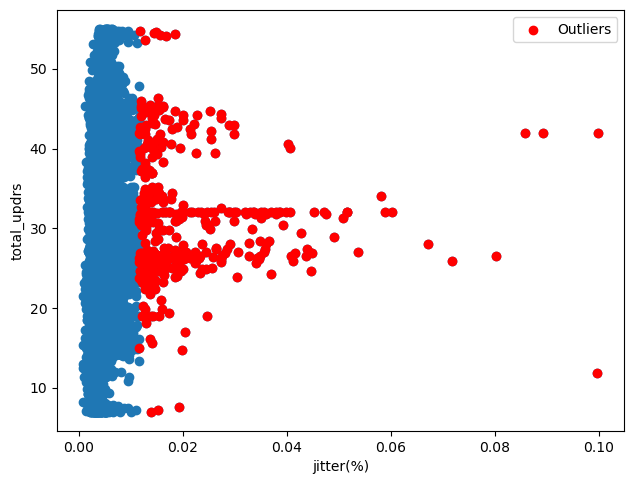

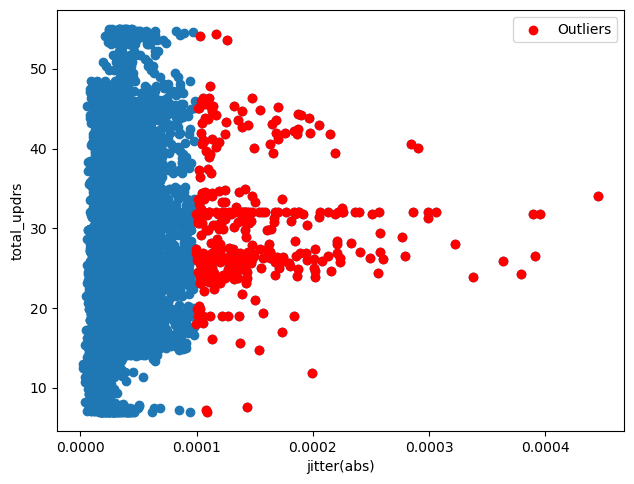

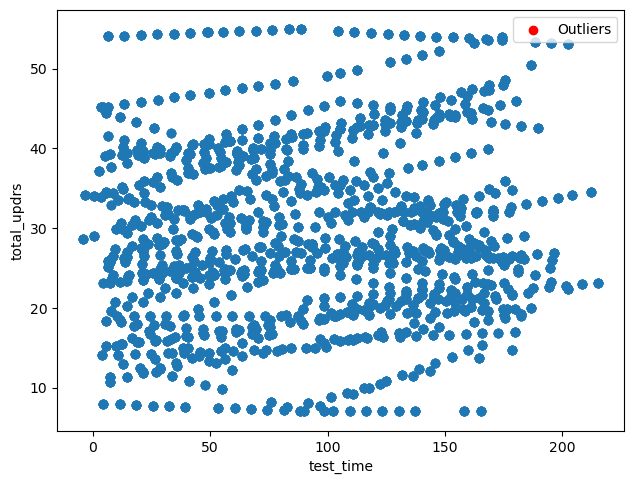

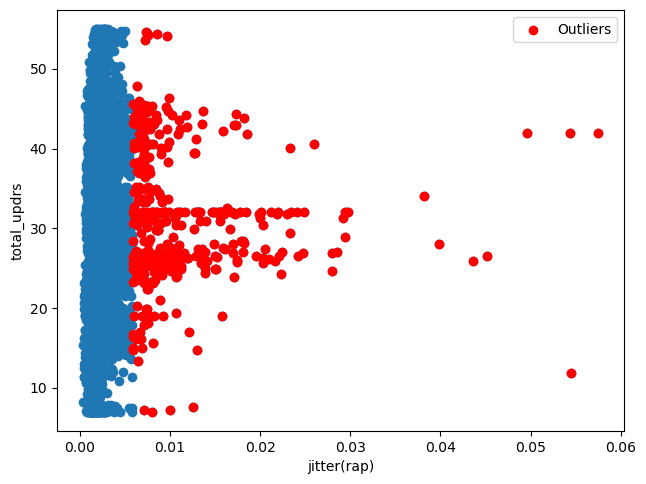

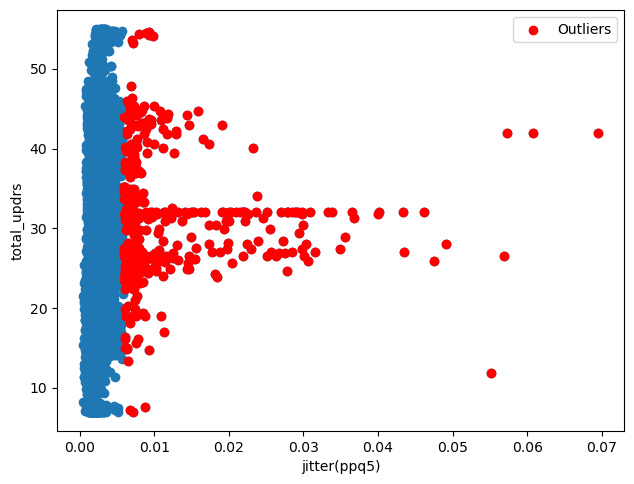

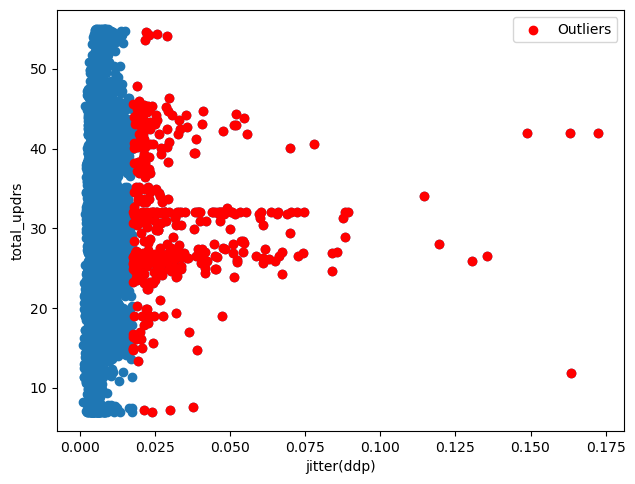

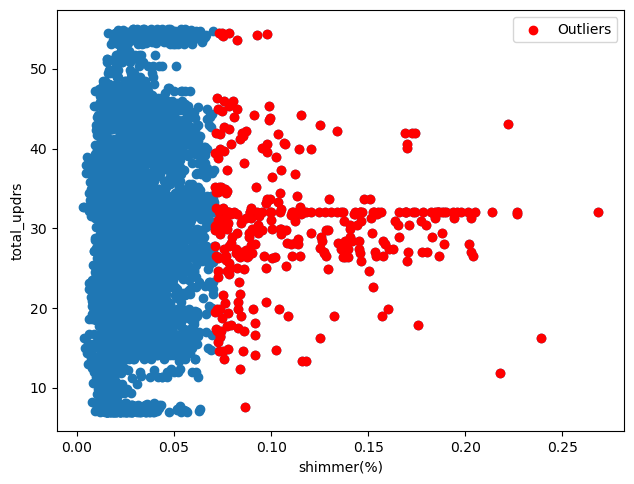

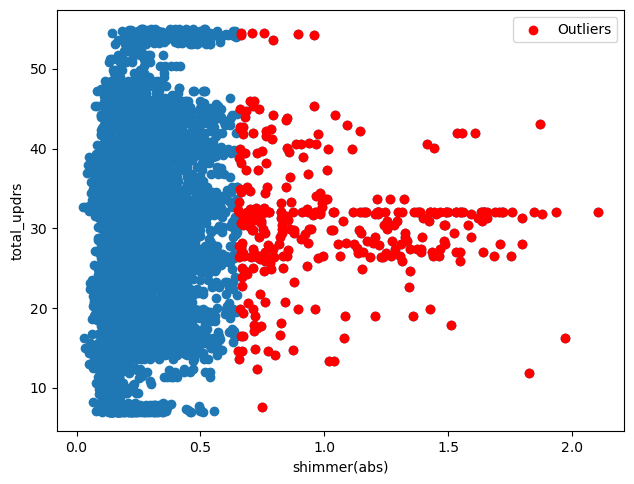

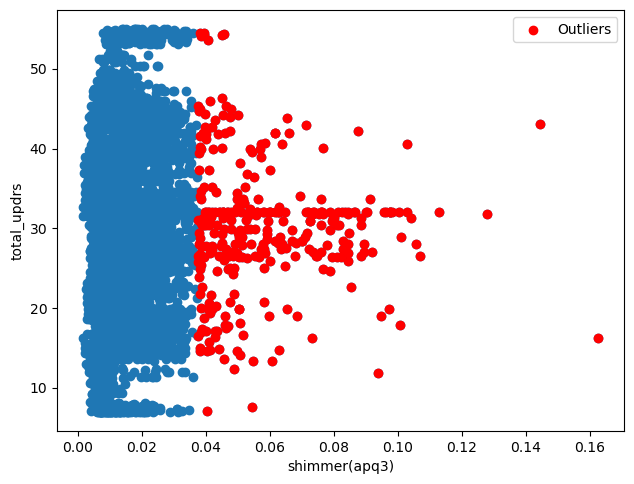

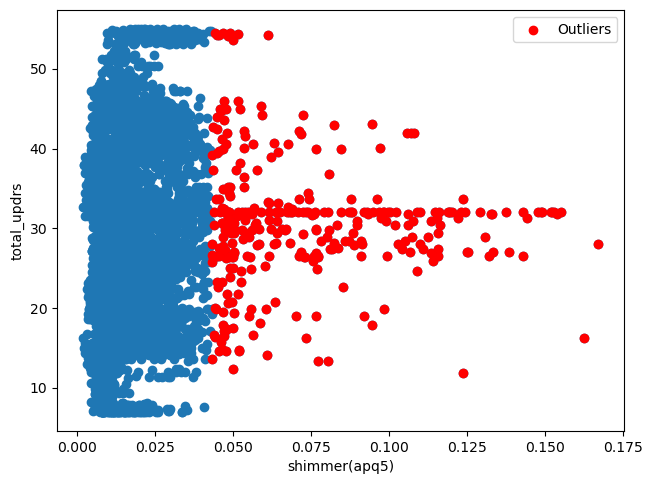

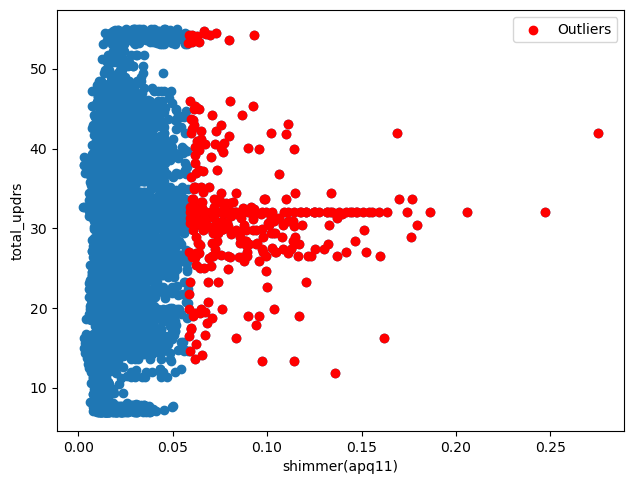

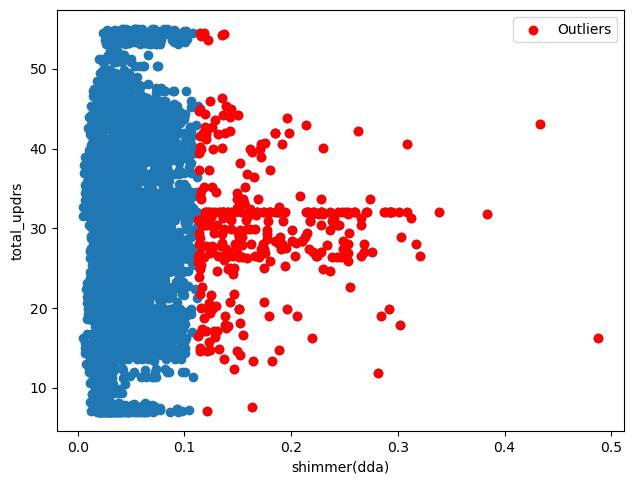

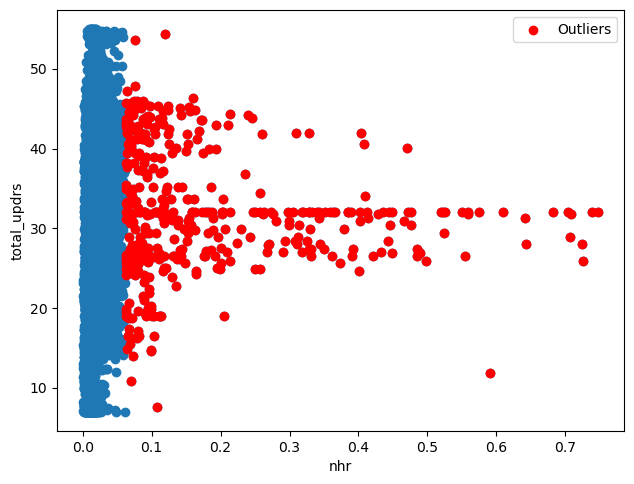

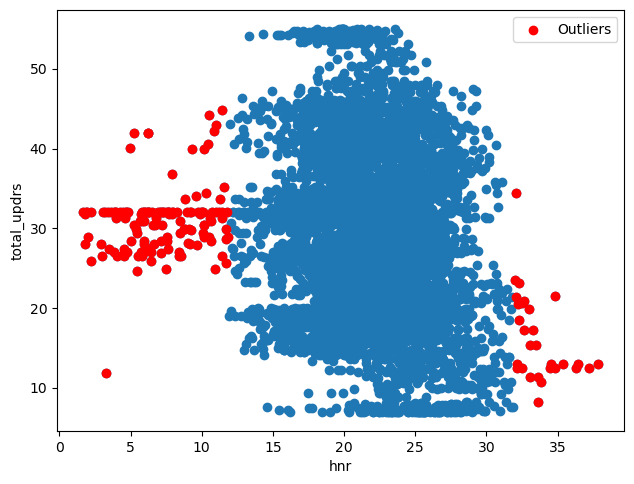

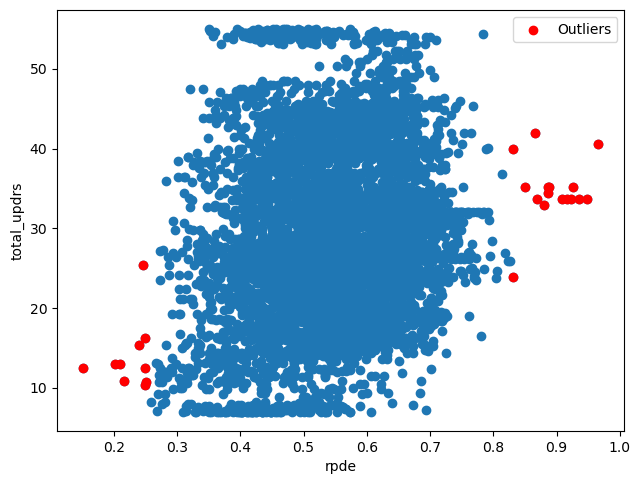

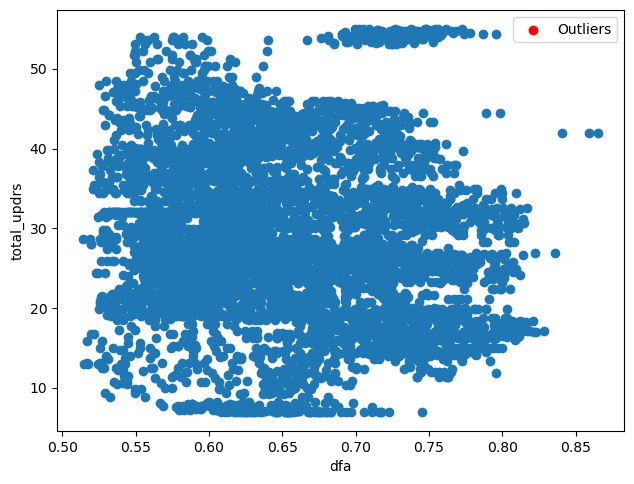

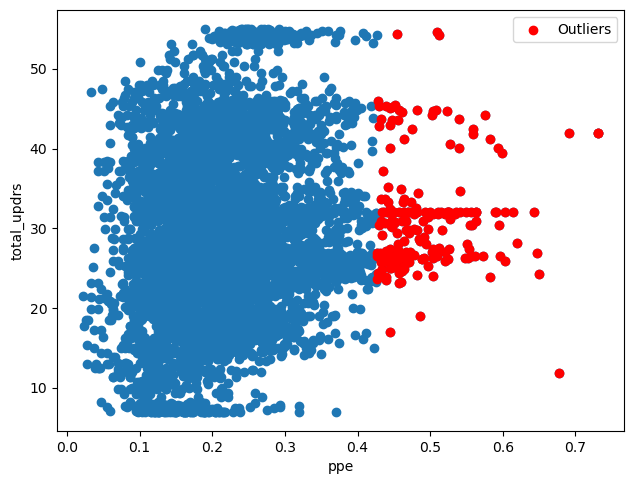

In [24]:
for i in range(0, 19):
    column_name = column_names[i]
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
#     df = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    fig1, ax1 = plt.subplots()
    fig1.tight_layout()
    ax1.scatter(x=df[column_name], y=df['total_updrs'])
    ax1.set_xlabel(column_name)
    ax1.set_ylabel("total_updrs")
    
    # Highlight outliers on the plot
    ax1.scatter(x=outliers[column_name], y=outliers['total_updrs'], color='red', label='Outliers')
    ax1.legend()
    
    plt.show()


# Box-plot on independent variables

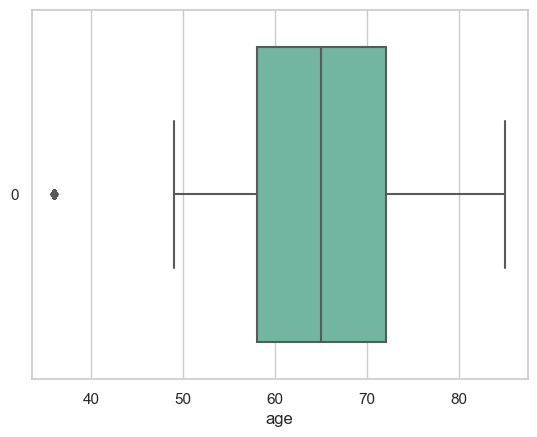

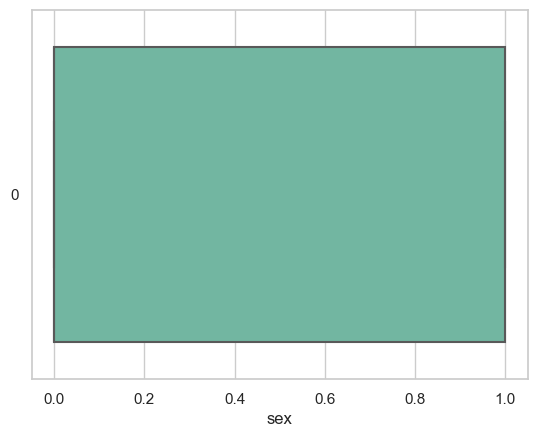

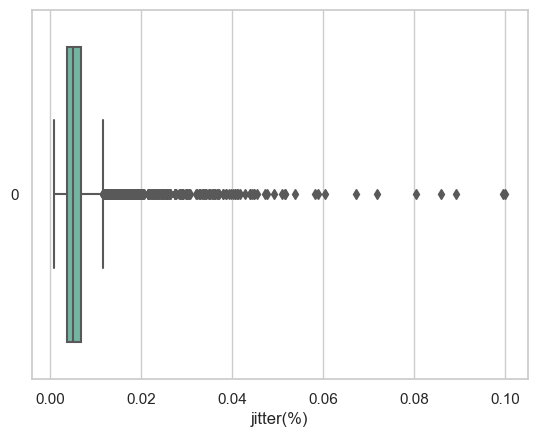

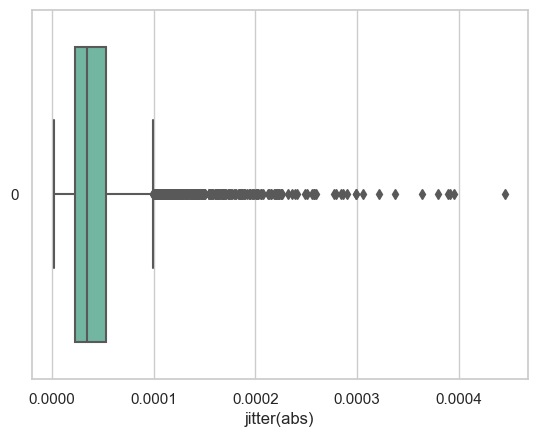

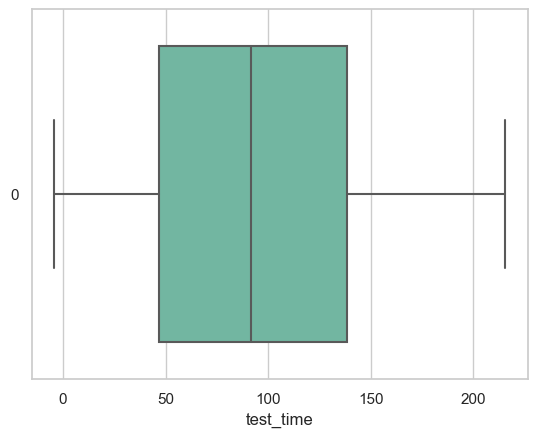

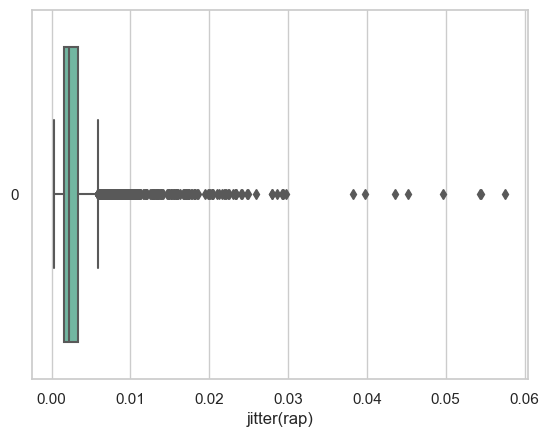

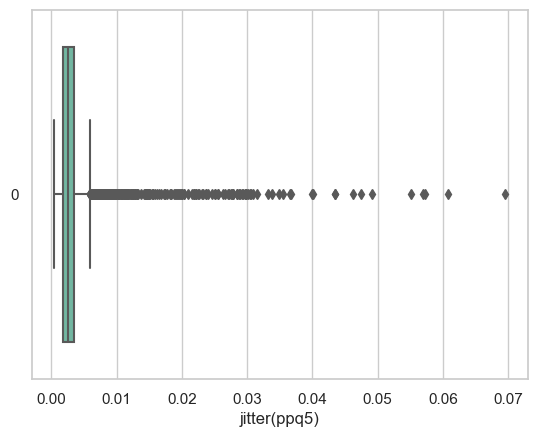

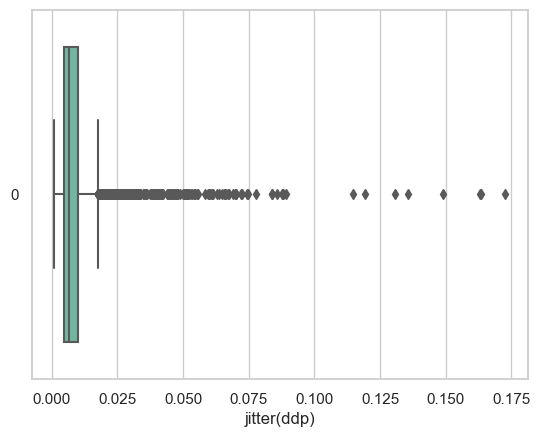

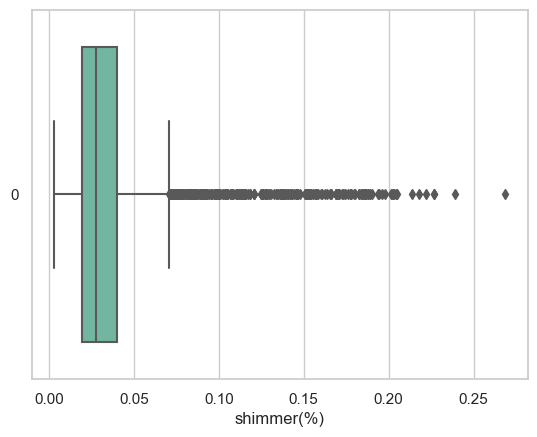

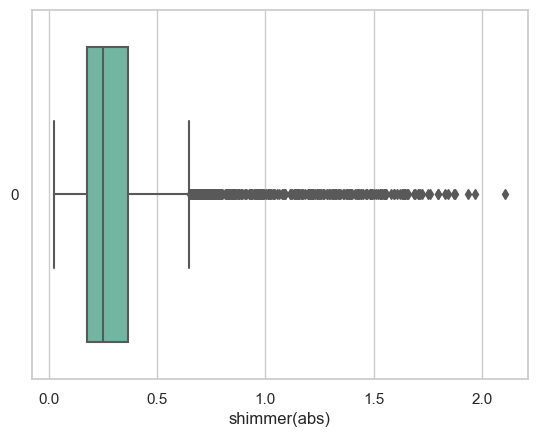

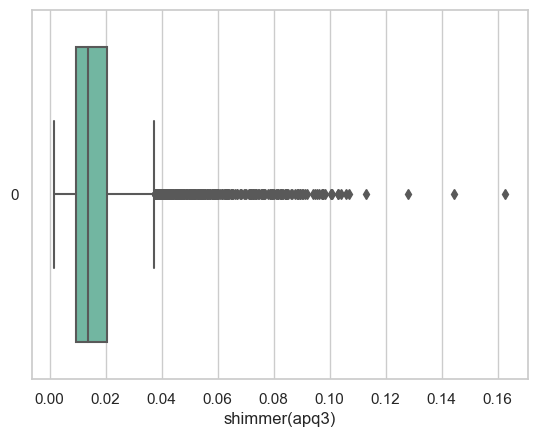

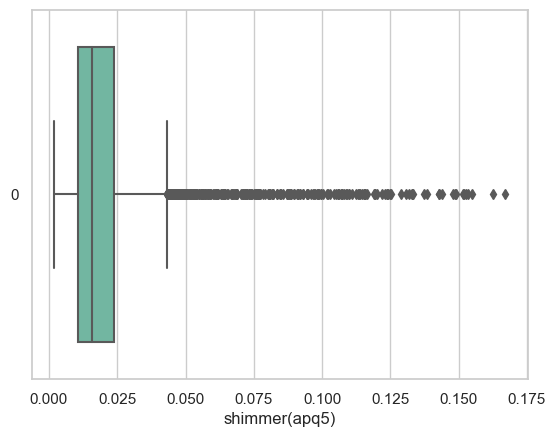

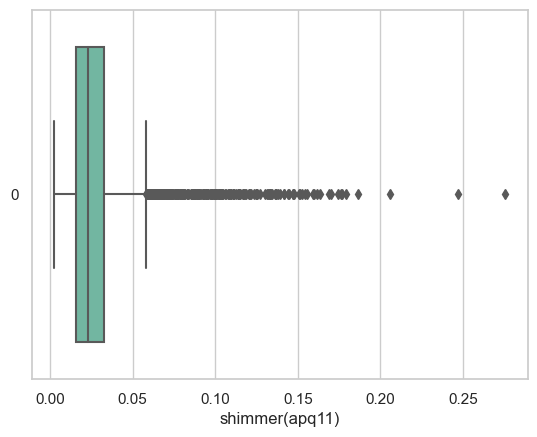

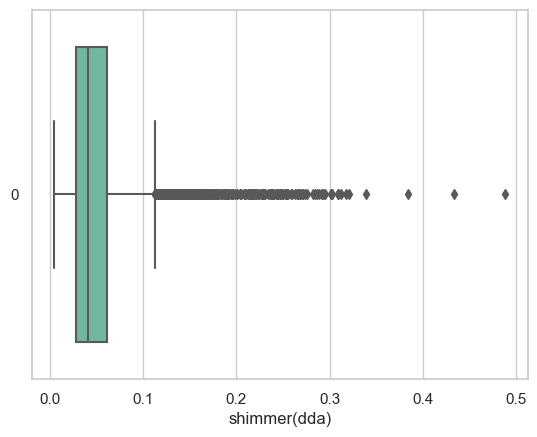

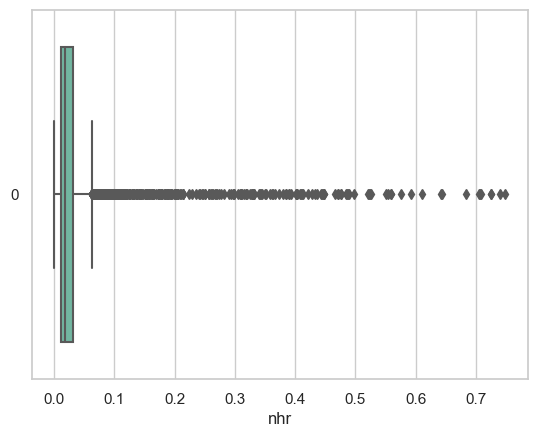

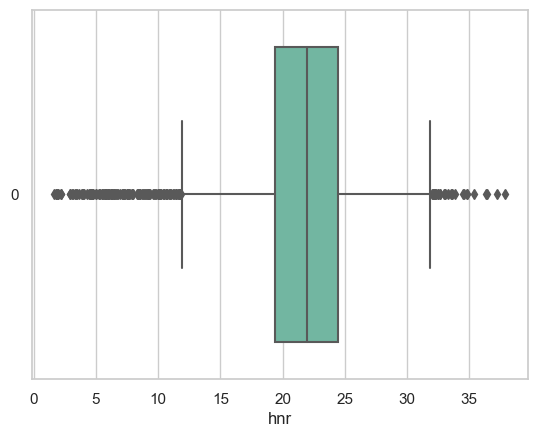

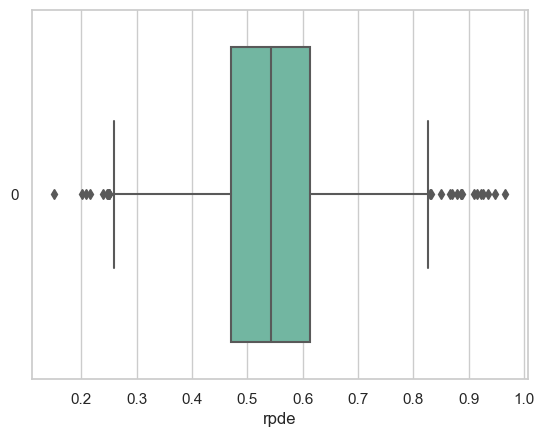

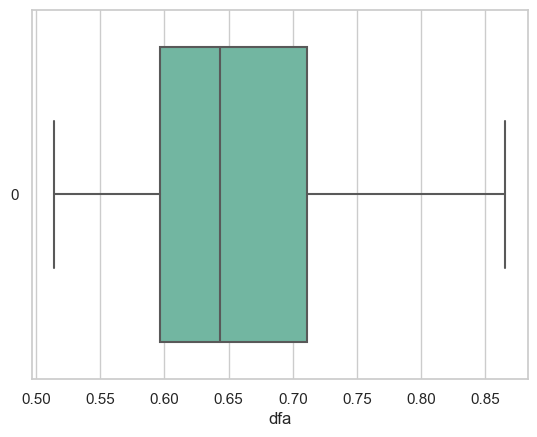

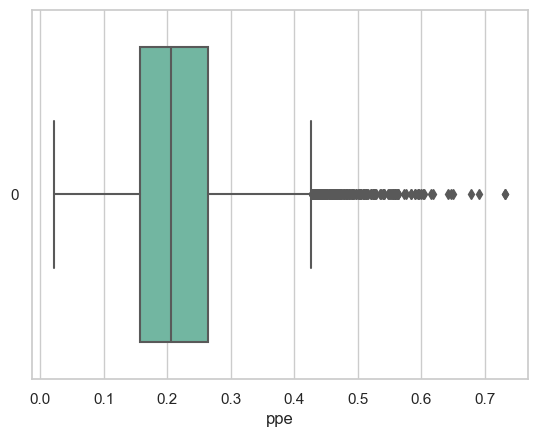

In [25]:
for i in range(0,19):
    
    sns.set_theme(style="whitegrid")  # optional
    ax = sns.boxplot(data=df[column_names[i]], orient="h", palette="Set2", whis=1.5)
    ax.set_xlabel(column_names[i])
    plt.show()

In [26]:
# Apply non-linear transformation
df["hnr_lt"] = df["hnr"].apply(np.log)
df["rpde_lt"] = df["rpde"].apply(np.log)
df["ppe_lt"] = df["ppe"].apply(np.log)

In [27]:
a= df.columns
print(a)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_updrs', 'total_updrs',
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe', 'hnr_lt', 'rpde_lt', 'ppe_lt'],
      dtype='object')


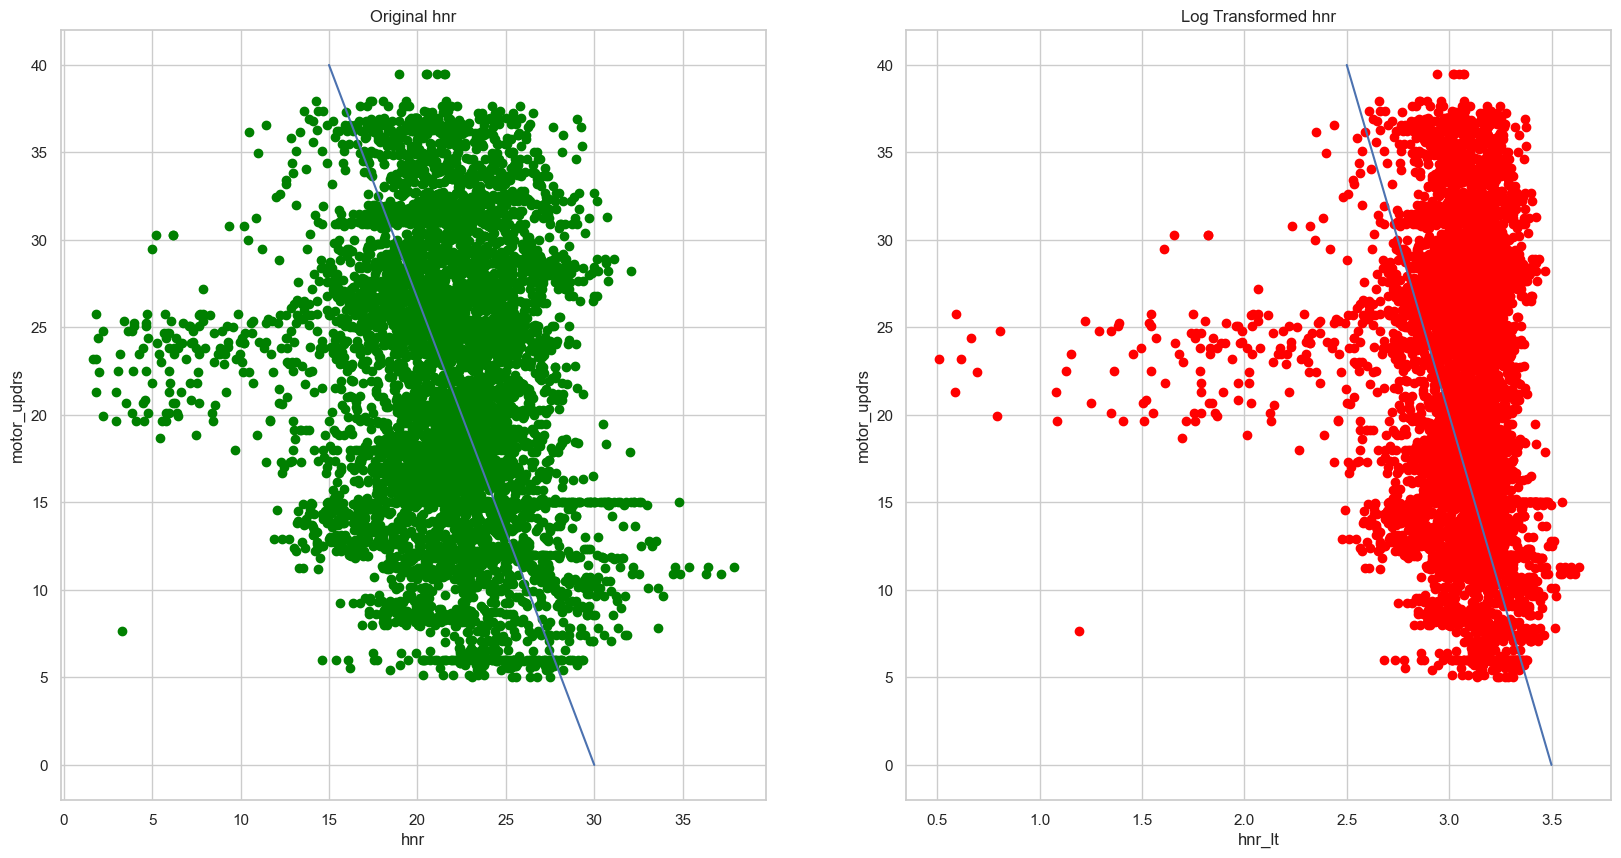

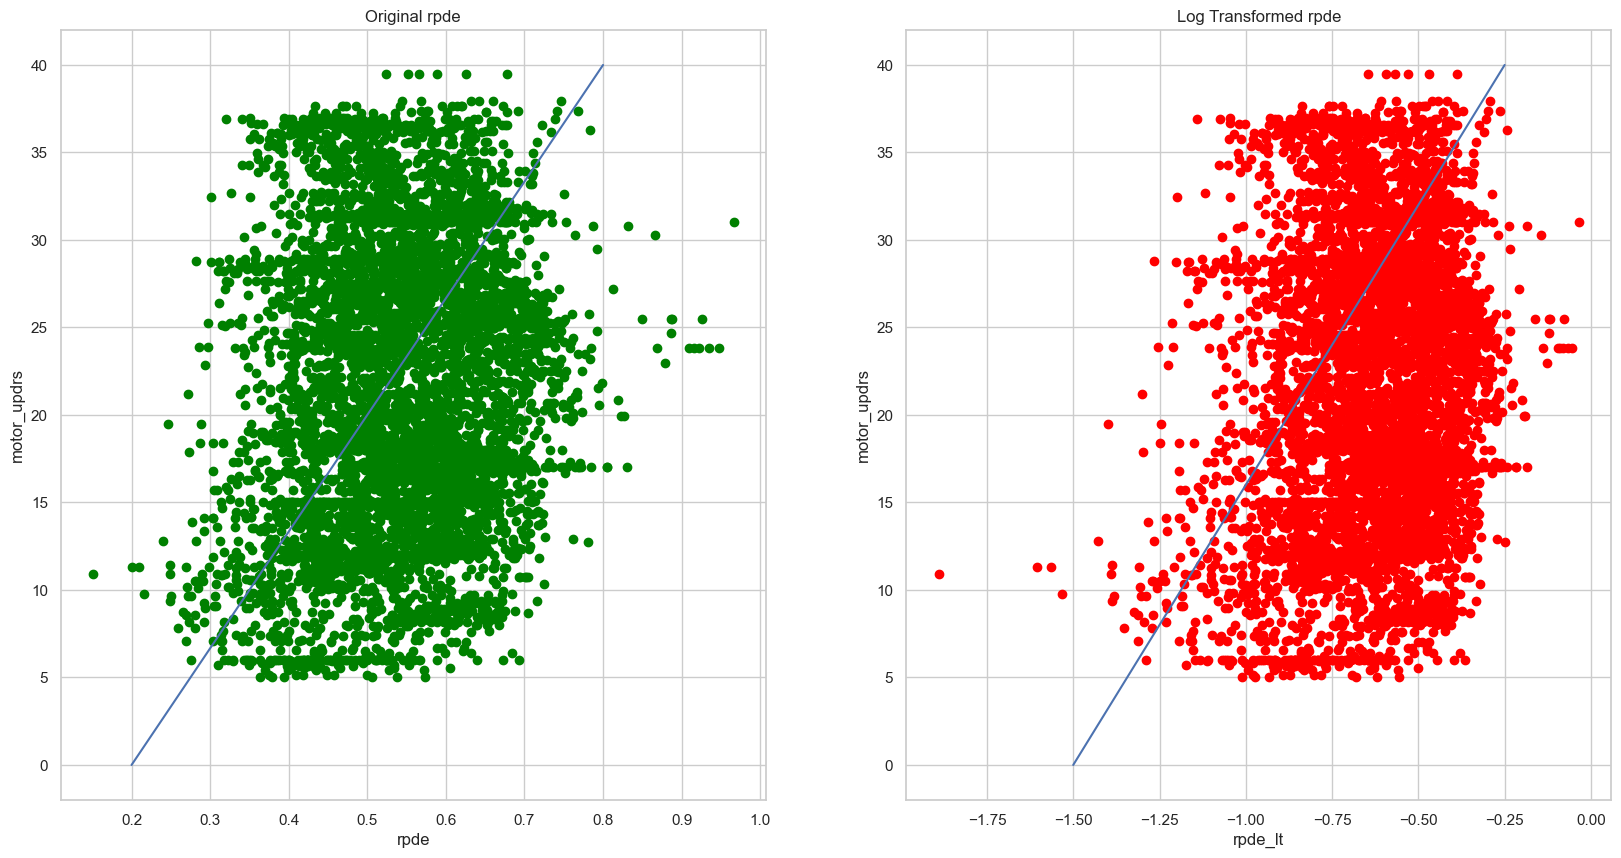

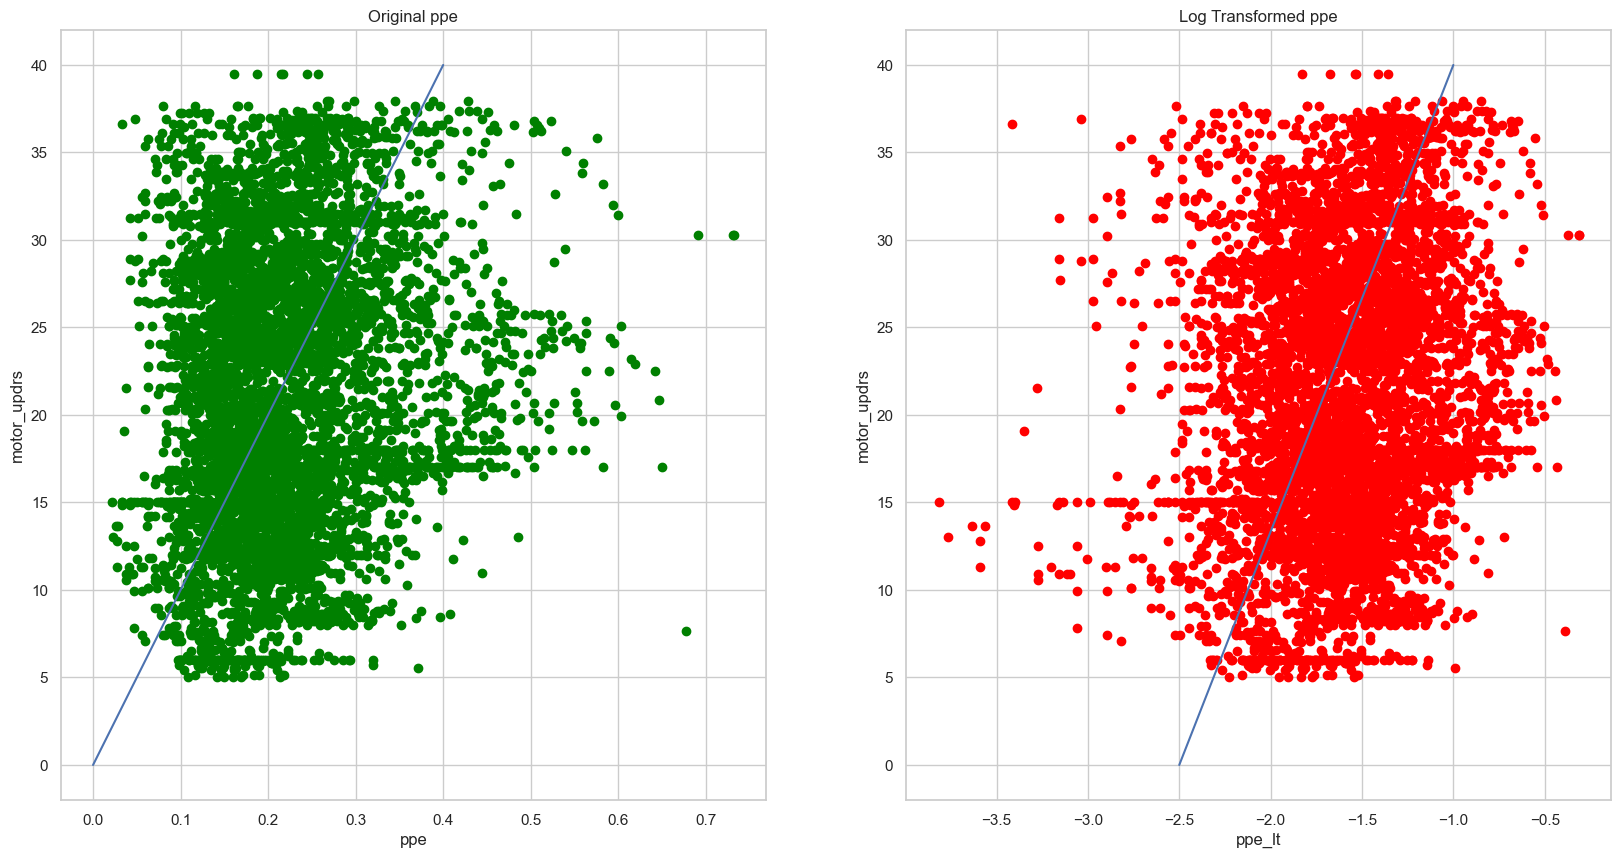

In [28]:
# Visualise the effect of the transformation
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df["hnr"], df["motor_updrs"], color="green")
plt.title("Original hnr")
plt.xlabel("hnr")
plt.ylabel("motor_updrs")
plt.plot([30,15],[0,40])

plt.subplot(1,2,2)
plt.scatter(df["hnr_lt"], df["motor_updrs"], color="red")
plt.title("Log Transformed hnr")
plt.xlabel("hnr_lt")
plt.ylabel("motor_updrs")
plt.plot([3.5,2.5],[0,40])

plt.show()

# Visualise the effect of the transformation
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df["rpde"], df["motor_updrs"], color="green")
plt.title("Original rpde")
plt.xlabel("rpde")
plt.ylabel("motor_updrs")
plt.plot([0.2,0.8],[0,40])

plt.subplot(1,2,2)
plt.scatter(df["rpde_lt"], df["motor_updrs"], color="red")
plt.title("Log Transformed rpde")
plt.xlabel("rpde_lt")
plt.ylabel("motor_updrs")
plt.plot([-1.5,-.25],[0,40])

plt.show()

# Visualise the effect of the transformation
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df["ppe"], df["motor_updrs"], color="green")
plt.title("Original ppe")
plt.xlabel("ppe")
plt.ylabel("motor_updrs")
plt.plot([0,0.4],[0,40])

plt.subplot(1,2,2)
plt.scatter(df["ppe_lt"], df["motor_updrs"], color="red")
plt.title("Log Transformed ppe")
plt.xlabel("ppe_lt")
plt.ylabel("motor_updrs")
plt.plot([-2.5,-1],[0,40])

plt.show()


In [29]:
print(a)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_updrs', 'total_updrs',
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe', 'hnr_lt', 'rpde_lt', 'ppe_lt'],
      dtype='object')


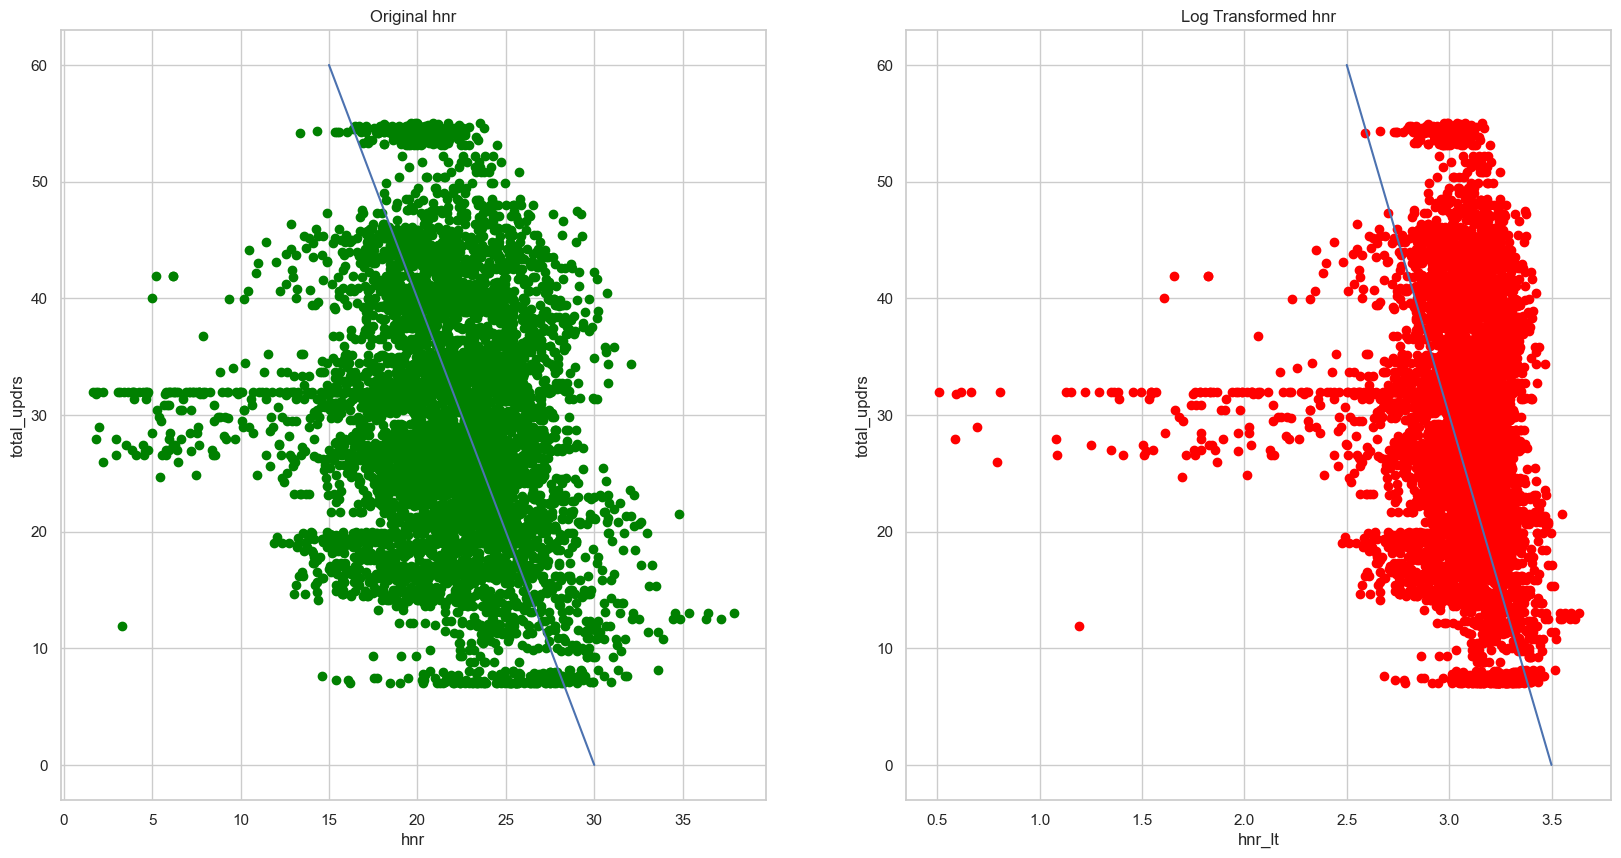

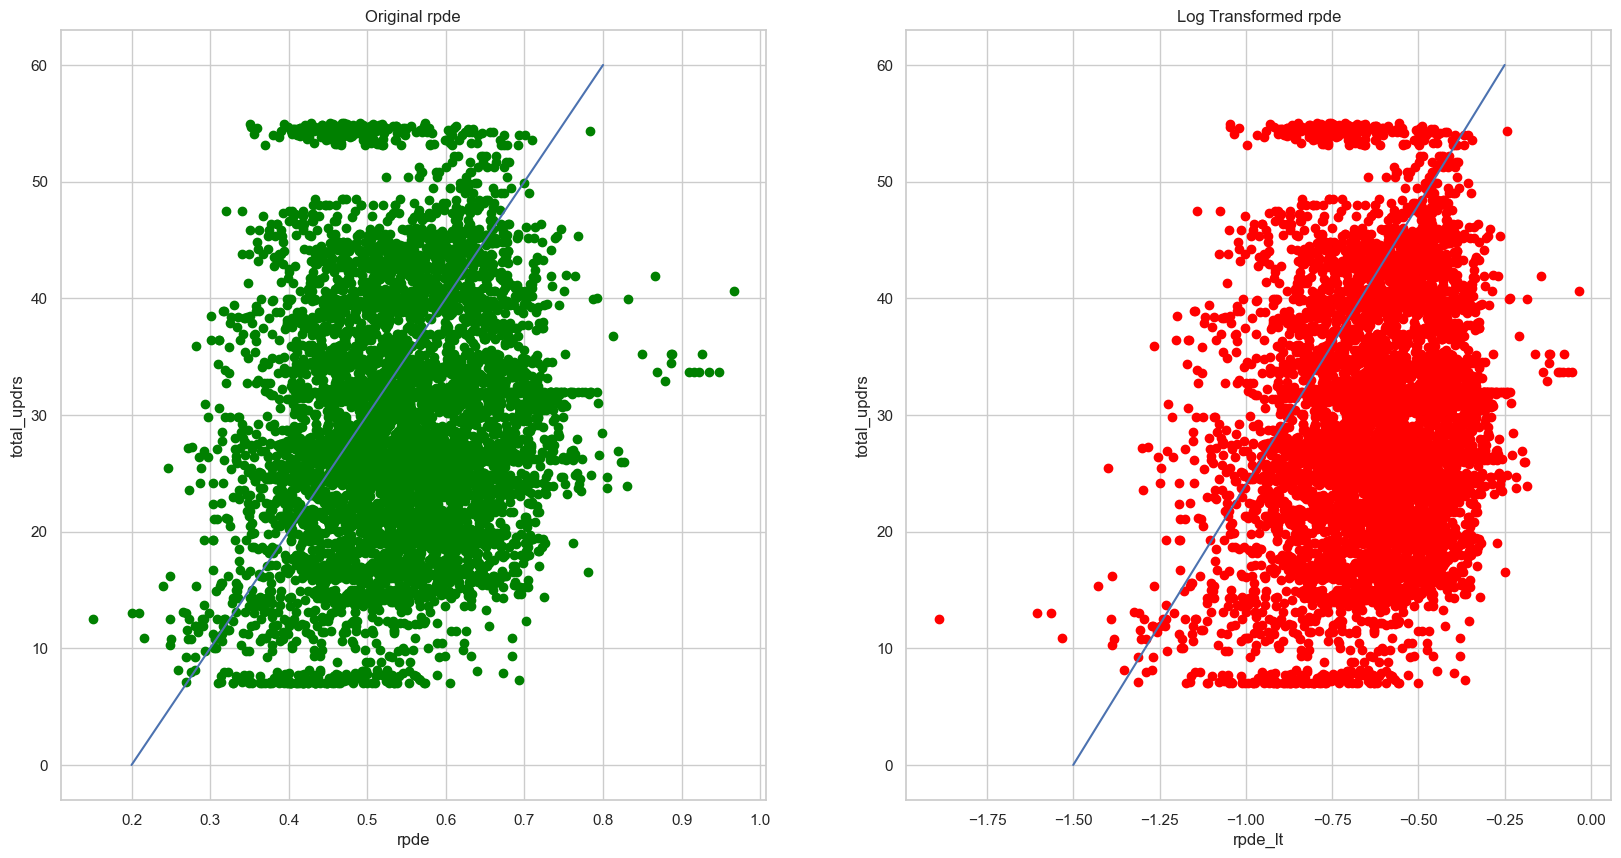

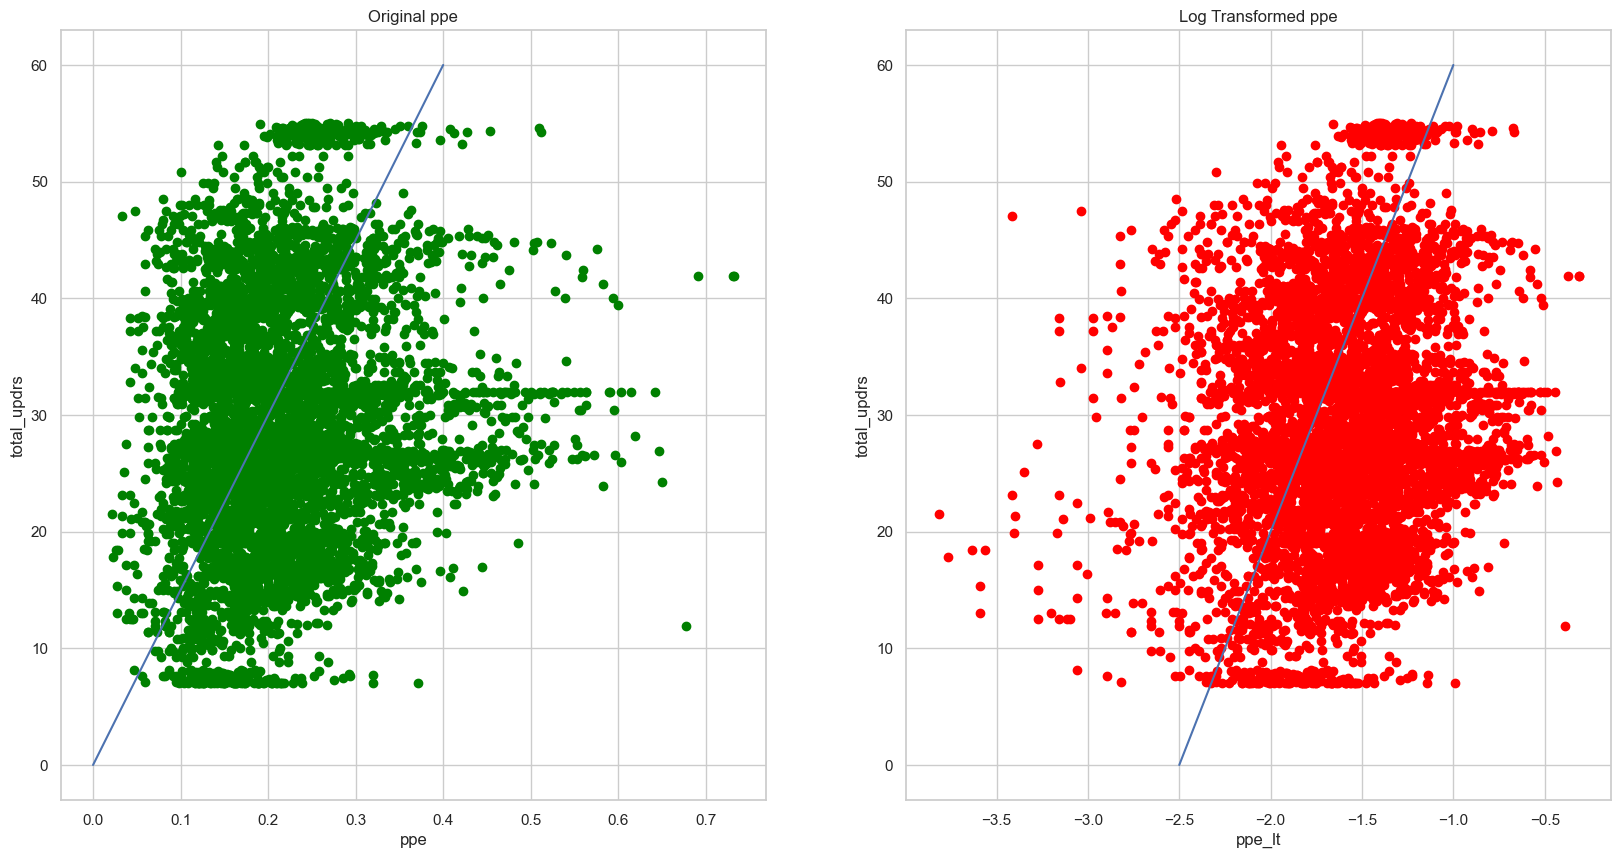

In [30]:
# Visualise the effect of the transformation
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df["hnr"], df["total_updrs"], color="green")
plt.title("Original hnr")
plt.xlabel("hnr")
plt.ylabel("total_updrs")
plt.plot([30,15],[0,60])

plt.subplot(1,2,2)
plt.scatter(df["hnr_lt"], df["total_updrs"], color="red")
plt.title("Log Transformed hnr")
plt.xlabel("hnr_lt")
plt.ylabel("total_updrs")
plt.plot([3.5,2.5],[0,60])

plt.show()

# Visualise the effect of the transformation
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df["rpde"], df["total_updrs"], color="green")
plt.title("Original rpde")
plt.xlabel("rpde")
plt.ylabel("total_updrs")
plt.plot([0.2,0.8],[0,60])

plt.subplot(1,2,2)
plt.scatter(df["rpde_lt"], df["total_updrs"], color="red")
plt.title("Log Transformed rpde")
plt.xlabel("rpde_lt")
plt.ylabel("total_updrs")
plt.plot([-1.5,-.25],[0,60])

plt.show()

# Visualise the effect of the transformation
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df["ppe"], df["total_updrs"], color="green")
plt.title("Original ppe")
plt.xlabel("ppe")
plt.ylabel("total_updrs")
plt.plot([0,0.4],[0,60])

plt.subplot(1,2,2)
plt.scatter(df["ppe_lt"], df["total_updrs"], color="red")
plt.title("Log Transformed ppe")
plt.xlabel("ppe_lt")
plt.ylabel("total_updrs")
plt.plot([-2.5,-1],[0,60])

plt.show()

In [31]:
#Drop the original LSTAT variable
df = df.drop("hnr", axis=1)
df = df.drop("rpde", axis=1)
df = df.drop("ppe", axis=1)

In [32]:
a= df.columns
print(a)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_updrs', 'total_updrs',
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'dfa',
       'hnr_lt', 'rpde_lt', 'ppe_lt'],
      dtype='object')


In [33]:
x = df[['age', 'sex', 'jitter(%)', 
              'jitter(abs)', 'test_time', 'jitter(rap)', 'jitter(ppq5)',
              'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 
              'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 
              'shimmer(dda)', 'nhr', 'hnr_lt', 'rpde_lt', 'dfa', 'ppe_lt']] 

y_mobile_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']

In [34]:
print(x)

      age  sex  jitter(%)  jitter(abs)  test_time  jitter(rap)  jitter(ppq5)  \
0      72    0    0.00662     0.000034     5.6431      0.00401       0.00317   
1      72    0    0.00300     0.000017    12.6660      0.00132       0.00150   
2      72    0    0.00481     0.000025    19.6810      0.00205       0.00208   
3      72    0    0.00528     0.000027    25.6470      0.00191       0.00264   
4      72    0    0.00335     0.000020    33.6420      0.00093       0.00130   
...   ...  ...        ...          ...        ...          ...           ...   
5870   61    0    0.00406     0.000031   142.7900      0.00167       0.00168   
5871   61    0    0.00297     0.000025   149.8400      0.00119       0.00147   
5872   61    0    0.00349     0.000025   156.8200      0.00152       0.00187   
5873   61    0    0.00281     0.000020   163.7300      0.00128       0.00151   
5874   61    0    0.00282     0.000021   170.7300      0.00135       0.00166   

      jitter(ddp)  shimmer(%)  shimmer(

Intercept:  50.66891707047961
Coefficient:  [ 1.95180066e-01 -7.45914789e-01  4.65145134e+02 -4.43771433e+04
  1.49126889e-02 -7.68503200e+04 -3.44490301e+02  2.56579476e+04
  1.32477908e+02 -2.52447396e+00  2.47772244e+04 -1.95644059e+02
  9.43294049e+01 -8.30553647e+03 -2.35934188e+01 -6.78592505e+00
  2.33448734e+00 -2.50491910e+01  2.49655800e+00]
      Actual  Predicted
5588  29.635  21.469938
4802  36.153  24.013450
3060  12.664  19.632340
4228  19.168  33.587557
5796  21.988  21.281978
...      ...        ...
4164  19.417  16.025496
457   18.298  26.020340
358   28.720  18.580206
441   12.338  24.934871
1640  18.742  22.717622

[2350 rows x 2 columns]
MLP performance:
MAE:  6.334100819698731
MSE:  56.335643845606754
RMSE:  7.505707418065718
RMSE (Normalised):  0.21772523715645783
R^2:  0.13375516489979888
Adjusted R^2 0.13094412273636524


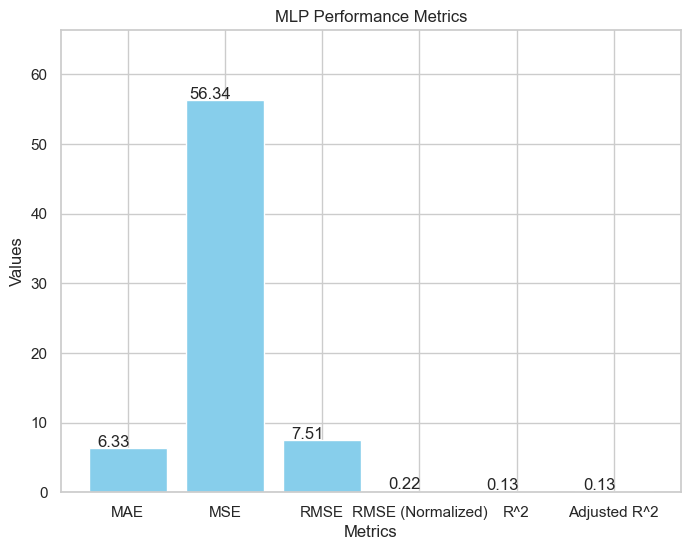

In [35]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(x, y_mobile_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

Intercept:  65.62994249518303
Coefficient:  [ 3.04391906e-01 -2.28300904e+00  9.62508446e+01 -3.96557993e+04
  2.15079512e-02 -9.70137210e+04 -3.42625893e+02  3.25872360e+04
  1.17814242e+02 -3.57228030e+00  1.38198461e+04 -1.34768240e+02
  8.85350983e+01 -4.66781213e+03 -2.90588772e+01 -8.47296903e+00
  4.64219297e+00 -3.36883245e+01  3.33605473e+00]
      Actual  Predicted
5588  37.635  27.979718
4802  54.153  33.260139
3060  26.443  25.929892
4228  23.237  43.636309
5796  32.988  29.620611
...      ...        ...
4164  29.476  22.503587
457   27.298  36.098262
358   36.402  25.265037
441   18.007  34.896181
1640  26.345  30.781588

[2350 rows x 2 columns]
MLP performance:
MAE:  8.01092414681808
MSE:  94.41828846704428
RMSE:  9.716907350955049
RMSE (Normalised):  0.20246931469734641
R^2:  0.1543367310985182
Adjusted R^2 0.15159247796288577


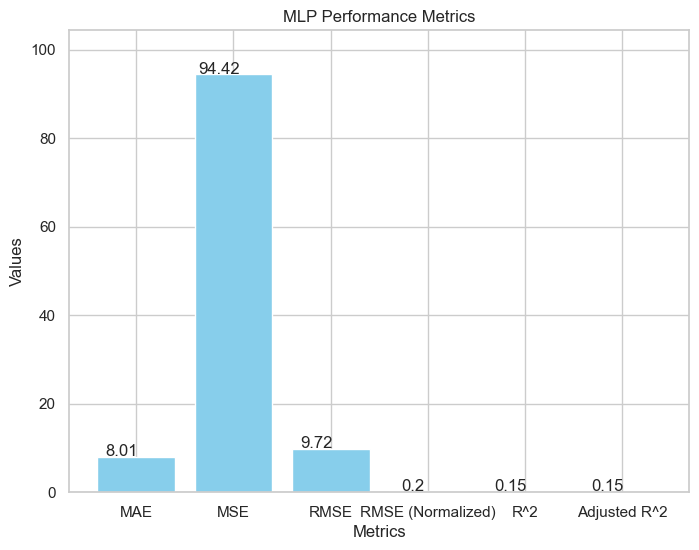

In [36]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(x, y_total_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# colinearity analysis

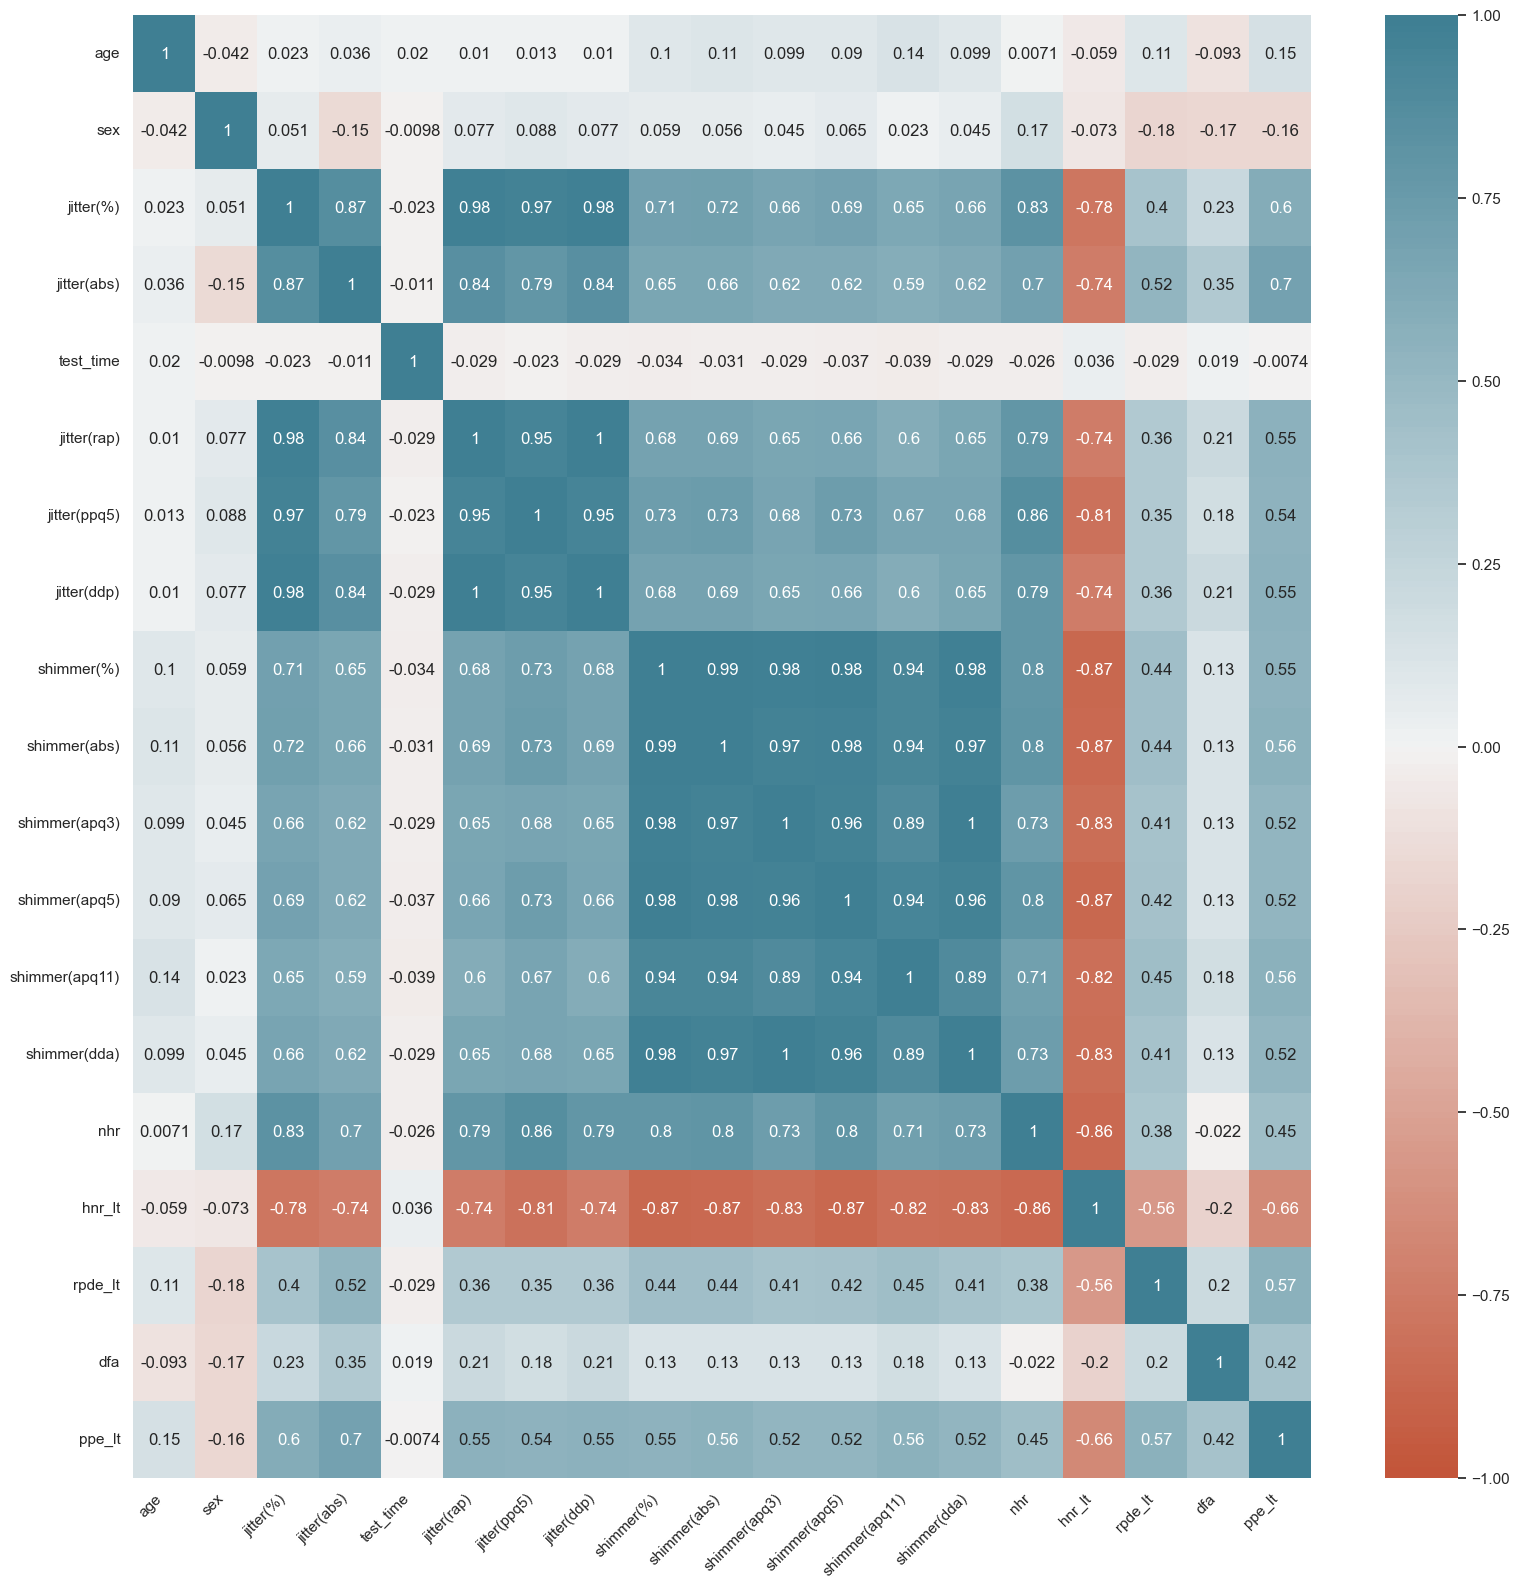

In [37]:
# Plot correlation matrix
corr = x.corr()

# Plot the pairwise correlation as heatmap
plt.figure(figsize=(19,19))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=True
)

# customise the labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

In [38]:
# Drop one or more of the correlated variables. Keep only one.
x = x.drop(["jitter(rap)","jitter(%)","jitter(ppq5)","shimmer(abs)","shimmer(apq3)","shimmer(%)","shimmer(apq5)"], axis=1)
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5875 non-null   int64  
 1   sex             5875 non-null   int64  
 2   jitter(abs)     5875 non-null   float64
 3   test_time       5875 non-null   float64
 4   jitter(ddp)     5875 non-null   float64
 5   shimmer(apq11)  5875 non-null   float64
 6   shimmer(dda)    5875 non-null   float64
 7   nhr             5875 non-null   float64
 8   hnr_lt          5875 non-null   float64
 9   rpde_lt         5875 non-null   float64
 10  dfa             5875 non-null   float64
 11  ppe_lt          5875 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 550.9 KB
None


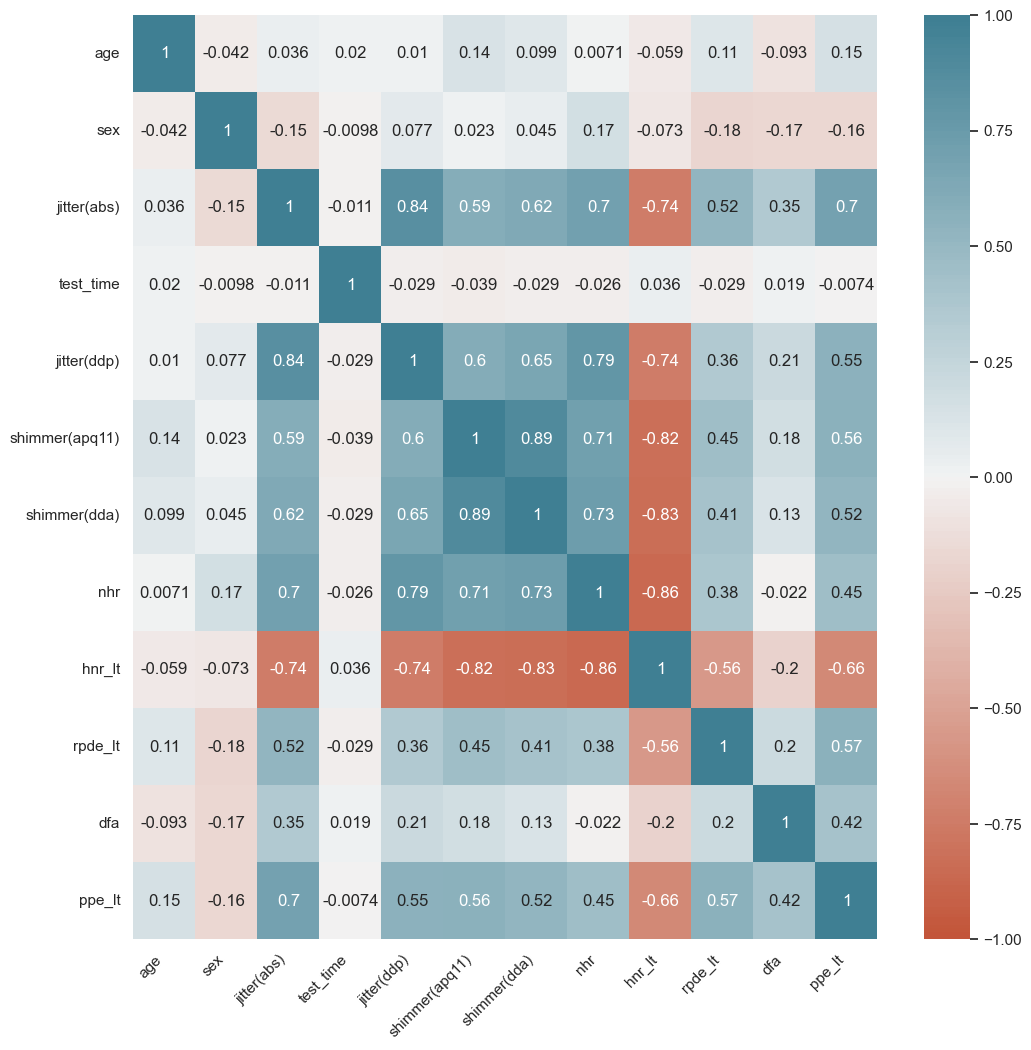

In [39]:
# Plot correlation matrix
corr = x.corr()

# Plot the pairwise correlation as heatmap
plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=True
)

# customise the labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

Intercept:  46.75880656106034
Coefficient:  [ 1.97799372e-01 -6.01025825e-01 -3.25658705e+04  1.49210140e-02
  1.71745263e+02  7.81351113e+01 -4.50193923e+01 -2.58212682e+01
 -4.92085446e+00  3.11451686e+00 -2.57396458e+01  2.98247729e+00]
      Actual  Predicted
5588  29.635  21.331123
4802  36.153  24.813308
3060  12.664  19.561612
4228  19.168  32.566943
5796  21.988  21.829899
...      ...        ...
4164  19.417  16.726358
457   18.298  26.337871
358   28.720  18.834761
441   12.338  25.448253
1640  18.742  22.429744

[2350 rows x 2 columns]
MLP performance:
MAE:  6.3408349869855565
MSE:  56.46029486709869
RMSE:  7.514006578856495
RMSE (Normalised):  0.21796597885483823
R^2:  0.13183846889374495
Adjusted R^2 0.13006127026302583


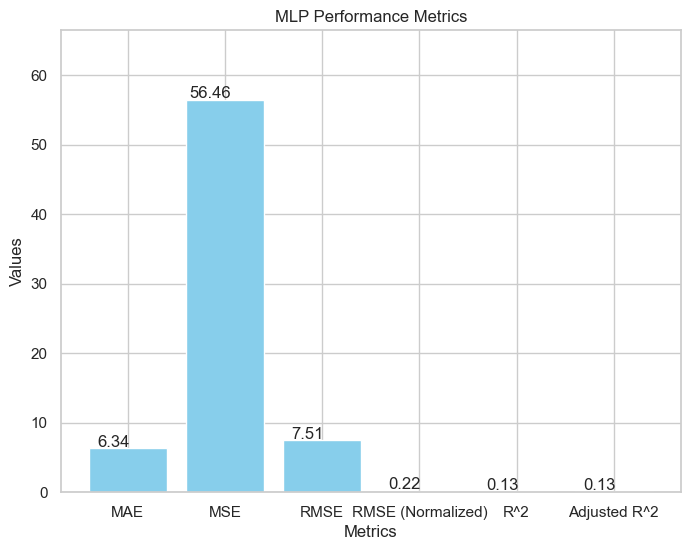

In [40]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(x, y_mobile_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

Intercept:  62.12389305497494
Coefficient:  [ 3.05537408e-01 -2.11548245e+00 -3.20412148e+04  2.13504681e-02
  1.97483016e+02  7.36225994e+01 -5.12985253e+01 -3.46771735e+01
 -7.06382339e+00  5.23458022e+00 -3.43625452e+01  3.47238637e+00]
      Actual  Predicted
5588  37.635  27.888116
4802  54.153  33.819099
3060  26.443  25.708720
4228  23.237  42.949000
5796  32.988  29.847719
...      ...        ...
4164  29.476  23.066693
457   27.298  36.610186
358   36.402  25.478226
441   18.007  35.295729
1640  26.345  30.475121

[2350 rows x 2 columns]
MLP performance:
MAE:  8.009930748565775
MSE:  94.52038068316823
RMSE:  9.722159260327318
RMSE (Normalised):  0.2025787477147716
R^2:  0.15342233581961084
Adjusted R^2 0.15168932115393963


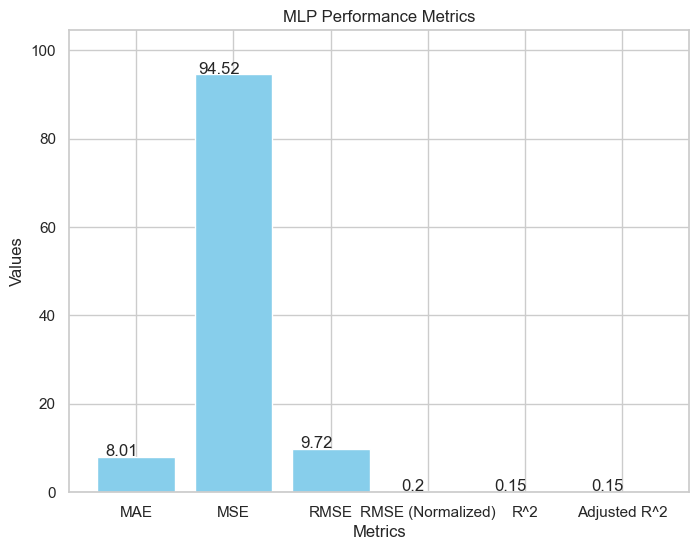

In [41]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(x, y_total_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# Part 4

# standard scaling

In [42]:
df = pd.read_csv("po2_data.csv")
x = df[['age', 'sex', 'jitter(%)', 
              'jitter(abs)', 'test_time', 'jitter(rap)', 'jitter(ppq5)',
              'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 
              'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 
              'shimmer(dda)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']] 

y_mobile_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
print(x)
scaler = StandardScaler()
# Apply z-score standardisation to all explanatory variables
std_x = scaler.fit_transform(x.values)

      age  sex  jitter(%)  jitter(abs)  test_time  jitter(rap)  jitter(ppq5)  \
0      72    0    0.00662     0.000034     5.6431      0.00401       0.00317   
1      72    0    0.00300     0.000017    12.6660      0.00132       0.00150   
2      72    0    0.00481     0.000025    19.6810      0.00205       0.00208   
3      72    0    0.00528     0.000027    25.6470      0.00191       0.00264   
4      72    0    0.00335     0.000020    33.6420      0.00093       0.00130   
...   ...  ...        ...          ...        ...          ...           ...   
5870   61    0    0.00406     0.000031   142.7900      0.00167       0.00168   
5871   61    0    0.00297     0.000025   149.8400      0.00119       0.00147   
5872   61    0    0.00349     0.000025   156.8200      0.00152       0.00187   
5873   61    0    0.00281     0.000020   163.7300      0.00128       0.00151   
5874   61    0    0.00282     0.000021   170.7300      0.00135       0.00166   

      jitter(ddp)  shimmer(%)  shimmer(

In [45]:
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)
print(std_x_df)

           age       sex  jitter(%)  jitter(abs)  test_time  jitter(rap)  \
0     0.815695 -0.682509   0.082905    -0.284242  -1.632090     0.327453   
1     0.815695 -0.682509  -0.560793    -0.756723  -1.500676    -0.533746   
2     0.815695 -0.682509  -0.238944    -0.539382  -1.369410    -0.300038   
3     0.815695 -0.682509  -0.155370    -0.485186  -1.257773    -0.344859   
4     0.815695 -0.682509  -0.498557    -0.663894  -1.108169    -0.658604   
...        ...       ...        ...          ...        ...          ...   
5870 -0.431361 -0.682509  -0.372307    -0.358449   0.934231    -0.421694   
5871 -0.431361 -0.682509  -0.566128    -0.537436   1.066152    -0.575365   
5872 -0.431361 -0.682509  -0.473663    -0.537158   1.196763    -0.469717   
5873 -0.431361 -0.682509  -0.594579    -0.658336   1.326064    -0.546552   
5874 -0.431361 -0.682509  -0.592801    -0.637213   1.457050    -0.524142   

      jitter(ppq5)  jitter(ddp)  shimmer(%)  shimmer(abs)  shimmer(apq3)  \
0        -0

Intercept:  21.31000161114157
Coefficient:  [ 1.70955514e+00 -4.68665071e-01  1.80474943e+00 -2.01847010e+00
  7.86335179e-01 -2.33847366e+02 -1.12251726e+00  2.34757931e+02
  3.86222768e+00 -1.37816897e+00  3.19915421e+02 -2.63645214e+00
  1.58288213e+00 -3.21888166e+02 -7.64446291e-01 -1.54641714e+00
  2.88049539e-01 -1.79535486e+00  1.55556696e+00]
      Actual  Predicted
5588  29.635  21.254943
4802  36.153  24.627460
3060  12.664  19.476097
4228  19.168  33.224031
5796  21.988  21.374672
...      ...        ...
4164  19.417  15.606926
457   18.298  25.624220
358   28.720  18.989425
441   12.338  25.415005
1640  18.742  23.448985

[2350 rows x 2 columns]
MLP performance:
MAE:  6.299670230855888
MSE:  55.67732185466965
RMSE:  7.461723785739435
RMSE (Normalised):  0.21644936184639807
R^2:  0.14387785074404025
Adjusted R^2 0.14109965760384147


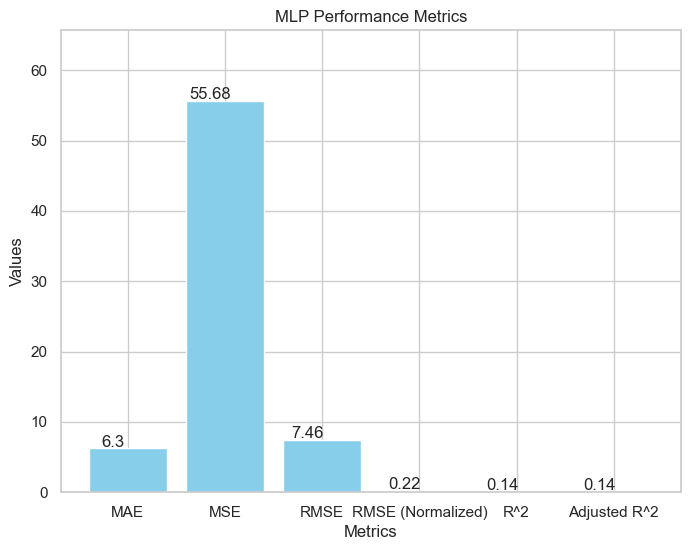

In [46]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(std_x_df, y_mobile_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

Intercept:  28.995760135389585
Coefficient:  [ 2.68790979e+00 -1.23095420e+00 -7.28863531e-02 -1.91894179e+00
  1.14428559e+00 -2.93258526e+02 -1.10312759e+00  2.96002675e+02
  3.49762717e+00 -1.59258209e+00  1.88876243e+02 -1.55985542e+00
  1.37354134e+00 -1.91586002e+02 -1.06354672e+00 -2.27836350e+00
  6.67549039e-01 -2.41154469e+00  1.71863953e+00]
      Actual  Predicted
5588  37.635  27.723756
4802  54.153  34.037335
3060  26.443  25.772311
4228  23.237  43.410240
5796  32.988  29.700347
...      ...        ...
4164  29.476  21.823001
457   27.298  35.692800
358   36.402  25.892567
441   18.007  35.444275
1640  26.345  31.593040

[2350 rows x 2 columns]
MLP performance:
MAE:  7.970479198532787
MSE:  93.61267427230176
RMSE:  9.675364296619625
RMSE (Normalised):  0.2016036901279302
R^2:  0.1615522647039297
Adjusted R^2 0.1588314266218417


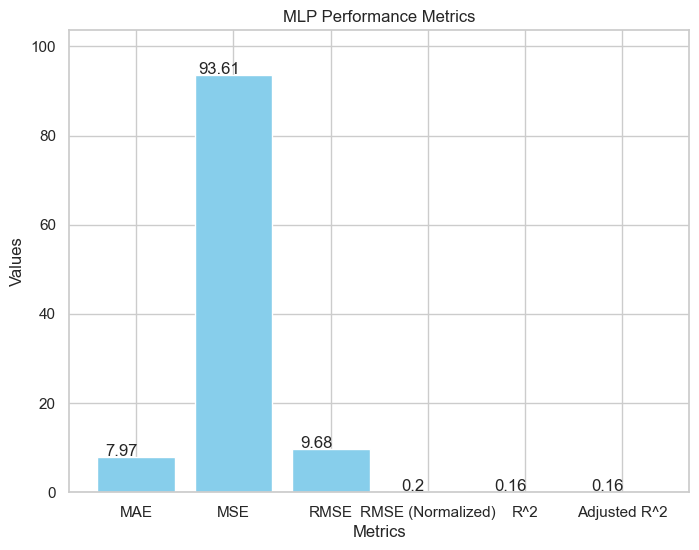

In [47]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(std_x_df, y_total_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# gaussian transform

Intercept:  21.295645641632458
Coefficient:  [   1.71602076   -1.52547529    3.74500964   -5.83143443    0.82170293
  -31.0030022     1.92019656   31.26946062    3.10729805   -1.68790561
  114.31119279   -5.58197616    4.34071532 -115.48455237   -1.02755418
   -2.54341006    0.74991321   -1.58973809    0.11720836]
      Actual  Predicted
5588  29.635  22.524682
4802  36.153  26.065743
3060  12.664  19.664360
4228  19.168  30.363232
5796  21.988  21.667778
...      ...        ...
4164  19.417  14.772402
457   18.298  24.642586
358   28.720  21.866084
441   12.338  24.273327
1640  18.742  25.136603

[2350 rows x 2 columns]
MLP performance:
MAE:  6.171053260974547
MSE:  53.98787766094358
RMSE:  7.347644361354432
RMSE (Normalised):  0.21314015082264917
R^2:  0.16985558361625197
Adjusted R^2 0.16716169054856778


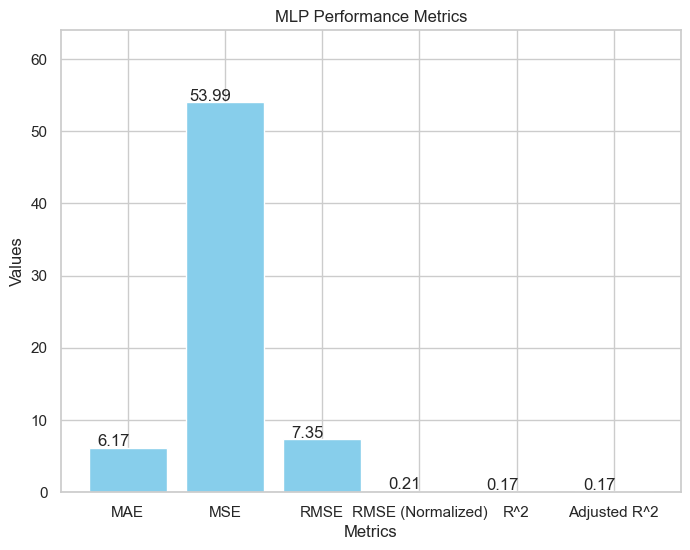

In [48]:
df = pd.read_csv("po2_data.csv")
x = df[['age', 'sex', 'jitter(%)', 
              'jitter(abs)', 'test_time', 'jitter(rap)', 'jitter(ppq5)',
              'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 
              'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 
              'shimmer(dda)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']] 

y_mobile_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']


from sklearn.preprocessing import PowerTransformer
# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)

# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_m, y_test_m = train_test_split(std_x_df, y_mobile_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_m)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_m, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_m, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_m, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_m, y_pred))
# Normalised Root Mean Square Error
y_max = y_mobile_updrs.max()
y_min = y_mobile_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_m, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

Intercept:  28.98999444011304
Coefficient:  [   2.75159744   -1.96512797    2.09433857   -3.92048258    1.16285184
  -87.50665542    0.56047253   89.5062491     1.81496104   -1.16505786
  119.57759528   -5.27548236    4.24855287 -120.57416307   -1.88079609
   -3.40449152    0.99235268   -2.3826184     0.47823615]
      Actual  Predicted
5588  37.635  29.028887
4802  54.153  33.851945
3060  26.443  26.248577
4228  23.237  39.756882
5796  32.988  30.630378
...      ...        ...
4164  29.476  21.379937
457   27.298  34.491705
358   36.402  29.138776
441   18.007  33.102844
1640  26.345  33.106601

[2350 rows x 2 columns]
MLP performance:
MAE:  7.872018211794188
MSE:  92.50151459180093
RMSE:  9.617770770391699
RMSE (Normalised):  0.20040362498732497
R^2:  0.17150443544267213
Adjusted R^2 0.16881589304701217


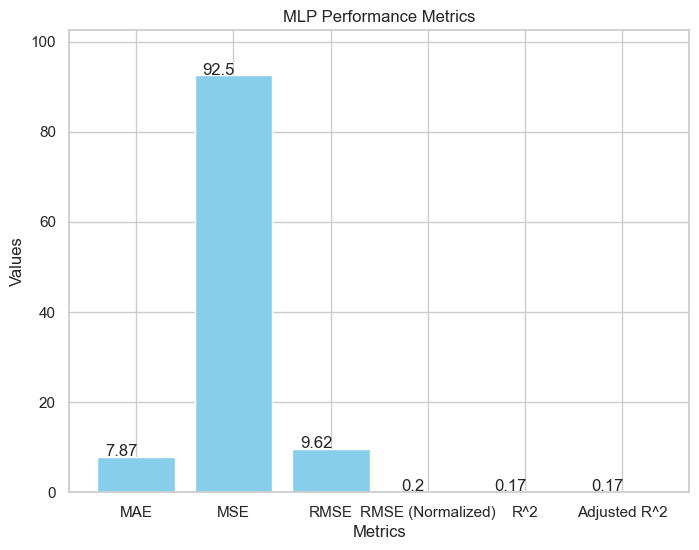

In [49]:
# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train_t, y_test_t = train_test_split(std_x_df, y_total_updrs, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train_t)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test_t, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test_t, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test_t, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test_t, y_pred))
# Normalised Root Mean Square Error
y_max = y_total_updrs.max()
y_min = y_total_updrs.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test_t, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_total_updrs)-1)/(len(y_total_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# Work on previous dataset

In [50]:
a = np.loadtxt('po1_data.txt',  delimiter = ',')


print(a)

df_old = pd.DataFrame(a)


df_old.columns = ['subject identifier', ' jitter in %', 'absolute jitter in ms', 'jitter r.a.p.', 'jitter p.p.q.5','jitter d.d.p.' ,
              'shimmer in %','absolute shimmer dB', 'shimmer a.p.q.3', 'shimmer a.p.q.5','shimmer a.p.q.11','shimmer d.d.a', 
              'autocorrelation between NHR and HNR', 'NHR','HNR','median pitch','mean pitch','sd of pitch','min pitch',
              'max pitch','number of pulses','number of periods','mean period','sd of period','fraction of unvoiced frames',
              'num of voice breaks','degree of voice breaks','UPDRS','PD label']


print(df_old)

column_names = list(df_old.columns)


df1 = df_old[df_old["PD label"] == 1]
df2 = df_old[df_old["PD label"] == 0]

salient_features = []
for i in range(1,28):
    print('Analysis of the measurement variable', column_names[i])
    print()
    sample1 = df1.iloc[:, i].to_numpy()
    sample2 = df2.iloc[:, i].to_numpy()
    
    

    # the basic statistics of sample 1:
    x_bar1 = st.tmean(sample1)
    s1 = st.tstd(sample1)
    n1 = len(sample1)
    print("\n Statistics of sample 1: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar1, s1, n1))
  
    # the basic statistics of sample 2:
    x_bar2 = st.tmean(sample2)
    s2 = st.tstd(sample2)
    n2 = len(sample2)
    print("\n Statistics of sample 2: %.3f (mean), %.3f (std. dev.), and %d (n)." % (x_bar2, s2, n2))
    

    # perform two-sample t-test
    # null hypothesis: mean of sample 1 = mean of sample 2
    # alternative hypothesis: mean of sample 1 is not equal to mean of sample 2
    # note the argument equal_var=False, which assumes that two populations do not have equal variance
    t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative='two-sided')
    print("\n Computing t* ...")
    print("\t t-statistic (t*): %.2f" % t_stats)

    print("\n Computing p-value ...")
    print("\t p-value: %.4f" % p_val)

    print("\n Conclusion:")
    if p_val < 0.05:
        print("\t We reject the null hypothesis for", column_names[i])
        salient_features.append(column_names[i])
    else:
        print("\t We accept the null hypothesis for", column_names[i])
        print()

        
print(salient_features)



[[1.00000e+00 1.48800e+00 9.02130e-05 ... 0.00000e+00 2.30000e+01
  1.00000e+00]
 [1.00000e+00 7.28000e-01 3.76980e-05 ... 0.00000e+00 2.30000e+01
  1.00000e+00]
 [1.00000e+00 1.22000e+00 7.40410e-05 ... 1.78000e-01 2.30000e+01
  1.00000e+00]
 ...
 [4.00000e+01 2.91200e+00 2.26205e-04 ... 4.57400e+00 1.00000e+00
  0.00000e+00]
 [4.00000e+01 3.78800e+00 2.74883e-04 ... 1.95750e+01 1.00000e+00
  0.00000e+00]
 [4.00000e+01 1.80900e+00 1.48510e-04 ... 3.38700e+00 1.00000e+00
  0.00000e+00]]
      subject identifier   jitter in %  absolute jitter in ms  jitter r.a.p.  \
0                    1.0         1.488               0.000090          0.900   
1                    1.0         0.728               0.000038          0.353   
2                    1.0         1.220               0.000074          0.732   
3                    1.0         2.502               0.000123          1.156   
4                    1.0         3.509               0.000167          1.715   
...                  ...    

We only use df1 for our linear regression model as they are ppd

Intercept:  52.842011458237884
Coefficient:  [-2.88963639e+00 -2.79909185e+03 -4.25705894e+03  4.12039392e+00
  1.42017657e+03  1.43125978e-01 -7.55985786e+00 -2.50285420e+01
 -6.36331158e-02 -1.43893347e-02 -2.25905963e-02  2.89166936e-04
 -1.94313370e+03  2.61885310e-01 -3.29387642e-01 -3.69494713e-02]
     Actual  Predicted
422     5.0  18.109460
107    16.0  18.363428
253    12.0  30.585995
235    12.0  17.266041
311    32.0  21.707221
..      ...        ...
313    23.0  19.331057
89      5.0  23.328642
435     5.0  23.657639
343     5.0  29.585858
419     5.0  16.204316

[208 rows x 2 columns]
MLP performance:
MAE:  11.690177294949574
MSE:  202.83698096275356
RMSE:  14.242084853094843
RMSE (Normalised):  0.2848416970618969
R^2:  0.07934072630228883
Adjusted R^2 0.07682612261858057


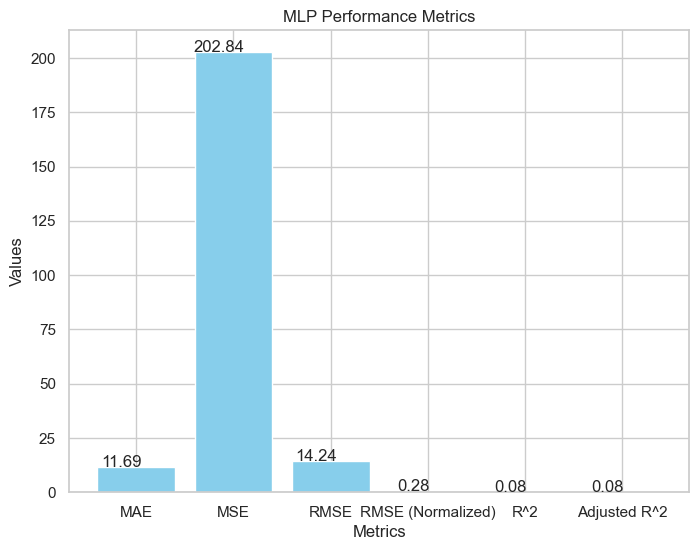

In [51]:
x = df1[[' jitter in %', 'absolute jitter in ms', 'jitter r.a.p.', 'jitter p.p.q.5', 
         'jitter d.d.p.', 'shimmer a.p.q.11', 'autocorrelation between NHR and HNR', 
         'NHR', 'median pitch', 'mean pitch', 'sd of pitch', 'max pitch', 'mean period',
         'fraction of unvoiced frames', 'num of voice breaks', 
         'degree of voice breaks']] 
y = df1['UPDRS']


# Split dataset into 60% training and 40% test sets 
# Note: other % split can be used.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set
# based on the values of x in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
# Root Mean Square Error
rmse =  math.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Normalised Root Mean Square Error
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r_2) * (len(y_mobile_updrs)-1)/(len(y_mobile_updrs)-x.shape[1]-1)
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)
print("Adjusted R^2", Adj_r2)

# Performance metrics and their corresponding values
metric = ['MAE', 'MSE', 'RMSE', 'RMSE (Normalized)', 'R^2', 'Adjusted R^2']
values = [mae, mse, rmse, rmse_norm, r_2, Adj_r2]

# Create a bar graph with values on top
plt.figure(figsize=(8, 6))
bars = plt.bar(metric, values, color='skyblue')

# Display the values on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.2, round(value, 2), ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MLP Performance Metrics')
plt.ylim(0, max(values) + 10)  # Setting y-axis limit for better visualization
plt.show()

# Now we do one sample t test on our new dataset to see the salient variables in the same way as before.

In [52]:
df = pd.read_csv("po2_data.csv")

x = df[['age', 'sex', 'jitter(%)', 
              'jitter(abs)', 'test_time', 'jitter(rap)', 'jitter(ppq5)',
              'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 
              'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 
              'shimmer(dda)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe']]

y_mobile_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']

column_names = list(x.columns)

salient_features = []

for i in range(0,19):
    print('Analysis of the measurement variable', column_names[i])
    print()
    # sample values
    sample = x.iloc[:, i].to_numpy()

    # compute mean and standard deviation of the sample
    print("Computing the basic statistics ...")
    x_bar = st.tmean(sample)
    s = st.tstd(sample)
    print("\t Sample mean: %.2f" % x_bar)
    print("\t Sample std. dev.: %.2f" % s)

    # perform one-sample t-test
    t_stats, p_val = st.ttest_1samp(sample, x_bar, alternative='greater')
    print("\n Computing t* ...")
    print("\t t-statistic (t*): %.2f" % t_stats)

    print("\n Computing p-value ...")
    print("\t p-value: %.4f" % p_val)

    print("\n Conclusion:")
    if p_val < 0.05:
        print("\t We reject the null hypothesis for", column_names[i])
        salient_features.append(column_names[i])
    else:
        print("\t We accept the null hypothesis for", column_names[i])
        print()

        
print(salient_features)

Analysis of the measurement variable age

Computing the basic statistics ...
	 Sample mean: 64.80
	 Sample std. dev.: 8.82

 Computing t* ...
	 t-statistic (t*): 0.00

 Computing p-value ...
	 p-value: 0.5000

 Conclusion:
	 We accept the null hypothesis for age

Analysis of the measurement variable sex

Computing the basic statistics ...
	 Sample mean: 0.32
	 Sample std. dev.: 0.47

 Computing t* ...
	 t-statistic (t*): 0.00

 Computing p-value ...
	 p-value: 0.5000

 Conclusion:
	 We accept the null hypothesis for sex

Analysis of the measurement variable jitter(%)

Computing the basic statistics ...
	 Sample mean: 0.01
	 Sample std. dev.: 0.01

 Computing t* ...
	 t-statistic (t*): 0.00

 Computing p-value ...
	 p-value: 0.5000

 Conclusion:
	 We accept the null hypothesis for jitter(%)

Analysis of the measurement variable jitter(abs)

Computing the basic statistics ...
	 Sample mean: 0.00
	 Sample std. dev.: 0.00

 Computing t* ...
	 t-statistic (t*): 0.00

 Computing p-value ...


In [53]:
print(salient_features)

[]
